## Hands-On Classification: A Complete Homework for Building an Effective ML Model

In the highly competitive banking industry, understanding customer behavior is crucial for designing effective marketing strategies. Banks invest heavily in marketing campaigns to promote their products and services, aiming to attract new customers and retain existing ones. One such product is a ***term deposit**, a fixed-term investment that offers higher interest rates than regular savings accounts. Convincing clients to subscribe to term deposits can significantly boost a bank's capital for lending and other investment opportunities.

Imagine you are a data scientist at a Portuguese bank. Your team is working on optimizing the bank's marketing campaigns to increase the subscription rate of term deposits. By leveraging historical data from previous campaigns, you aim to build a predictive model that can identify which clients are most likely to subscribe. This will enable the bank to target its resources more effectively, improve customer experience by tailoring communication, and ultimately enhance the return on investment for marketing efforts.

In this assignment, you will work with a real-world dataset containing information about the bank's clients, details of previous marketing activities, and whether the client eventually subscribed to a term deposit. This project offers a hands-on opportunity to apply machine learning techniques to a practical problem, illustrating how data-driven decisions can have a tangible impact on business outcomes.

*For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

## Dataset

In this homework, you will use the Bank Marketing Dataset. You can download it from [this link](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

From the downloaded zip archive, extract only the `bank/bank-full.csv` file. Place this file in the `data` directory within the folder containing your current notebook. When reading the data, use a semicolon (`;`) as the separator, as shown below:

```python
pd.read_csv('data/bank-full.csv', sep=';')
```

**Dataset Description**

*Client Data*

1. **Age**: (numeric)
2. **Job**: Type of job (categorical)
3. **Marital**: Marital status (categorical)
4. **Education**: (categorical)
5. **Default**: Has credit in default? (categorical)
6. **Housing**: Has housing loan? (categorical)
7. **Loan**: Has personal loan? (categorical)
8. **Balance**: Balance of the individual (numeric)

*Related to the Last Contact of the Current Campaign:*

9. **Contact**: Contact communication type (categorical)
10. **Month**: Last contact month of the year (categorical)
11. **Day**: Last contact day of the week (categorical)
12. **Duration**: Last contact duration, in seconds (numeric) *(Note: This attribute should only be included for benchmark purposes and should be discarded for realistic predictive models.)*

*Current and previous Campaign Interactions:*

13. **Campaign**: Number of contacts performed during this campaign and for this client (numeric)
14. **Pdays**: Days since last contact in a previous campaign (numeric; -1 means not previously contacted)
15. **Previous**: Number of contacts performed before this campaign for this client (numeric)
16. **Poutcome**: Outcome of the previous marketing campaign (categorical)

**Output Variable (Target):**

17. **Y**: Has the client subscribed to a term deposit? (binary: 'yes', 'no')

## Rules

1. **Tasks**:  
   - The assignment consists of multiple tasks designed to be completed in the given sequential order, covering topics such as data exploration, feature engineering, classification, hyperparameter tuning, model evaluation and interpretation, and handling imbalanced datasets. Do not change the order of tasks or delete any existing instructions in the notebook.

2. **Adding Cells**:  
   - You are welcome to add additional cells between tasks for notes, experiments, or debugging as needed. Ensure the main structure of the notebook remains intact.

3. **Seeking Help**:  
   - If you have any questions about the tasks or conditions, feel free to ask for clarification in the Discord channel. Active participation is highly encouraged!

4. **Partial Submissions**:  
   - If you are unable to complete all tasks by the general homework submission deadline, partial submissions are accepted. You will receive partial grading based on the work you submit.

## Importing Libaries

In [41]:
# HERE GOES YOUR CODE
import pandas as pd
import numpy as np
import seaborn as sns

## Load Data

In [30]:
# Place the bank-full.csv dataset from downloaded archive in the 'data' directory, then load it from the specified path
# use sep=';' parameter for reading csv file with pandas - pd.read_csv(path, sep=';')

path = pd.read_csv('D:/Users/ASUS-X509J/Desktop/bank-full.csv', sep=';')
path
# YOUR CODE TO LOAD THE DATA

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Inspection

In [31]:
# Display First 5 and last 5 rows of the dataframe to understand data structure
print(path.head())
print(path.tail())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
       age           job   marital  education default  balance housing loan  \
45206   51    technician   marri

In [32]:
# Display general information about the dataframe (columns type and number of non-missing values per column)
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [33]:
# Generate summary statistics (mean, max, min, standard deviation...) for numerical features.
path.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
# For each categorical column, display the unique categories along with the count of rows for each category, sorting them descendingly by count

for column in path.select_dtypes(include=['object', 'category']).columns:
    print(f"Column: {column}")
    print(path[column].value_counts().sort_values(ascending=False))
    print("\n")

Column: job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Column: marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Column: education
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Column: default
default
no     44396
yes      815
Name: count, dtype: int64


Column: housing
housing
yes    25130
no     20081
Name: count, dtype: int64


Column: loan
loan
no     37967
yes     7244
Name: count, dtype: int64


Column: contact
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


Column: month
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan   

## Exploratory Data Analysis

Create a bar plot to visualize the distribution of examples across the prediction classes (`y=no` and `y=yes`).

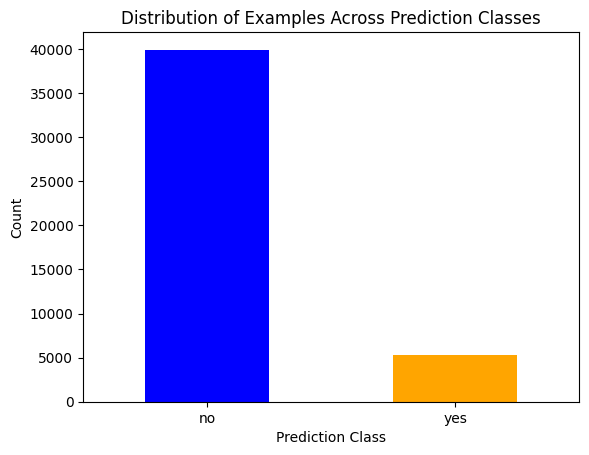

In [35]:
# YOU CODE GOES HERE
import pandas as pd
import matplotlib.pyplot as plt

class_counts = path['y'].value_counts()

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Examples Across Prediction Classes')
plt.xlabel('Prediction Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Is the current dataset balanced?

In [36]:
# YOUR ANSWER GOES HERE
class_counts = path['y'].value_counts()

print(class_counts)

if abs(class_counts['yes'] - class_counts['no']) <= 0.1 * len(path):
    print("The dataset is balanced.")
else:
    print("The dataset is imbalanced.")

y
no     39922
yes     5289
Name: count, dtype: int64
The dataset is imbalanced.


Create a 2x4 figure to display histograms for each of the 7 numerical features

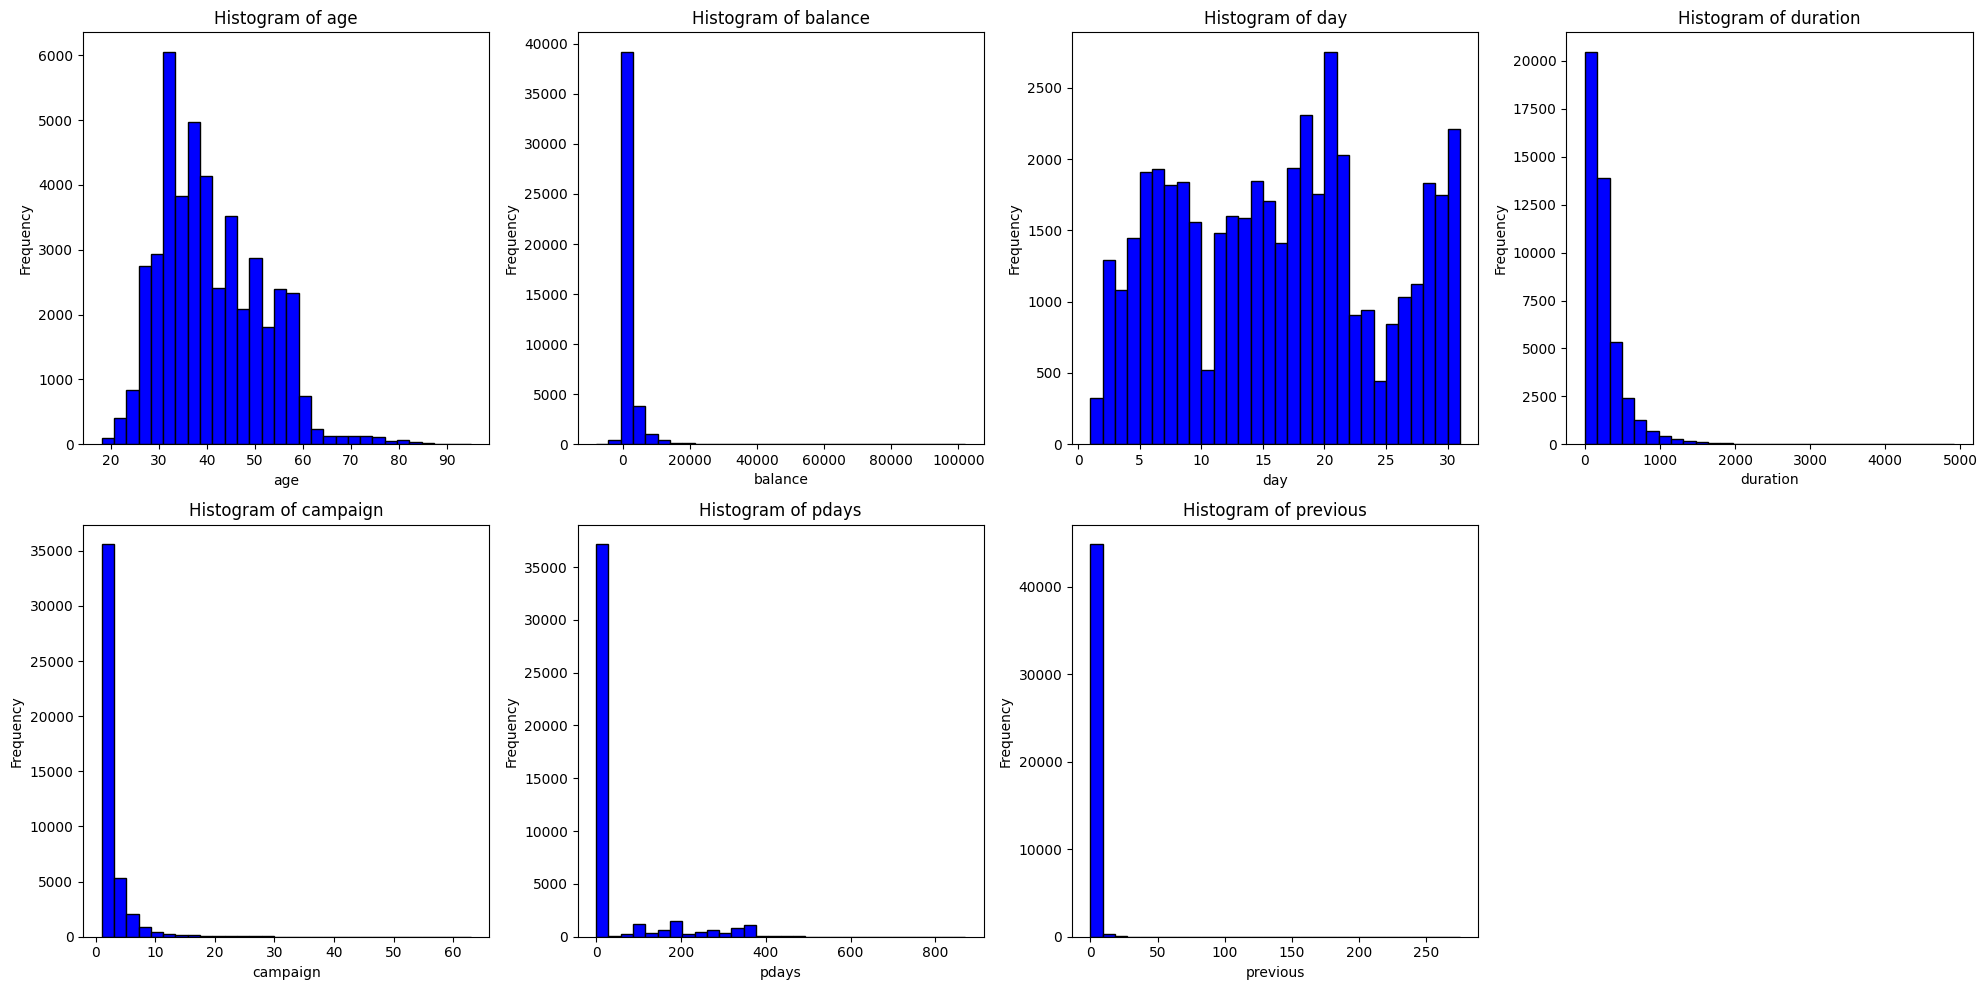

In [37]:
# YOUR CODE GOES HERE
numerical_features = path.select_dtypes(include=['number']).columns[:7]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].hist(path[feature], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

if len(numerical_features) < 8:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Which features exhibit a normal-like distribution?

Which features have skewed distributions?

In [38]:
# YOU ANSWER GOES HERE
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

skewness = path[numerical_features].skew()

print("Skewness of numerical features:")
print(skewness)

normal_like_features = skewness[abs(skewness) < 0.5].index.tolist()
skewed_features = skewness[abs(skewness) >= 0.5].index.tolist()

print("\nNormal-like distribution features:")
print(normal_like_features)

print("\nSkewed distribution features:")
print(skewed_features)

Skewness of numerical features:
age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Normal-like distribution features:
[]

Skewed distribution features:
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


Create two separate boxplots to compare the distribution of the `age` feature for the two classes: `y = yes` and `y = no`. This will help visualize how the `age` varies across the two categories.

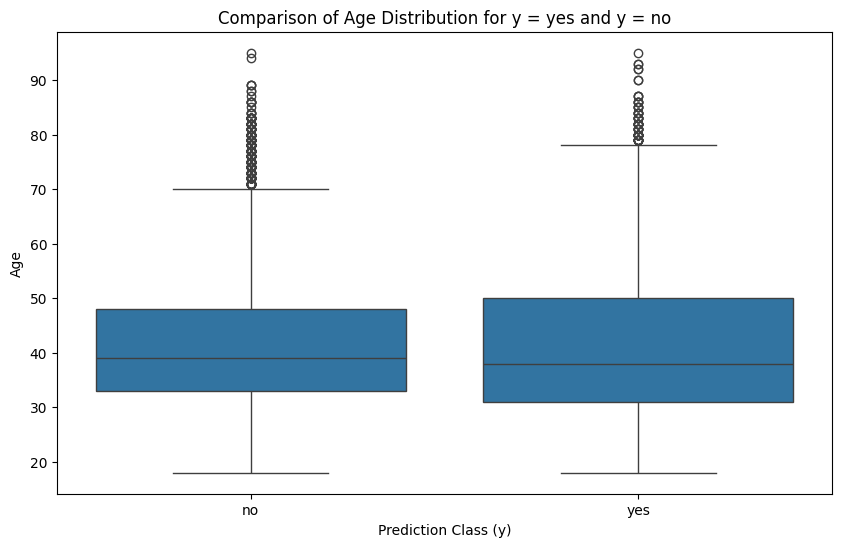

In [42]:
# YOU CODE GOES HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=path)
plt.title('Comparison of Age Distribution for y = yes and y = no')
plt.xlabel('Prediction Class (y)')
plt.ylabel('Age')
plt.show()

Create similar figures as above, but use the `day` and `duration` features instead of `age` to visualize how they vary across the two prediction categories (`y = yes` and `y = no`).

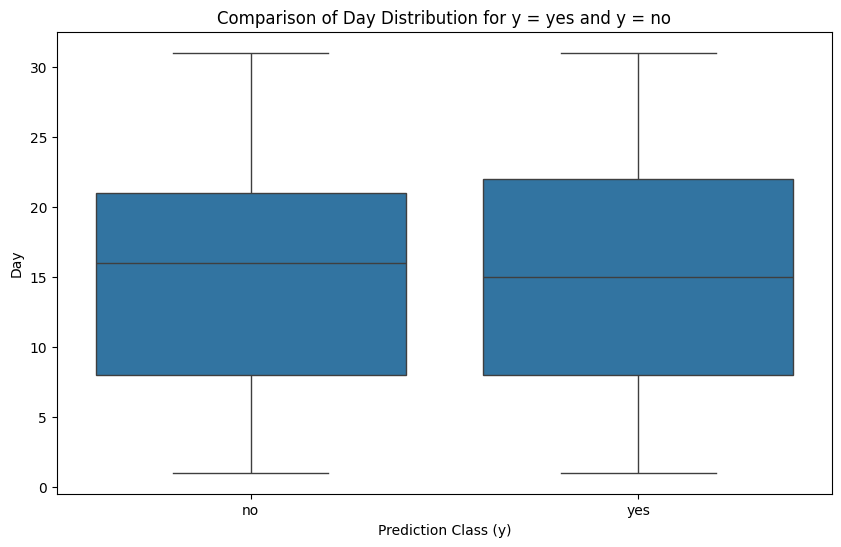

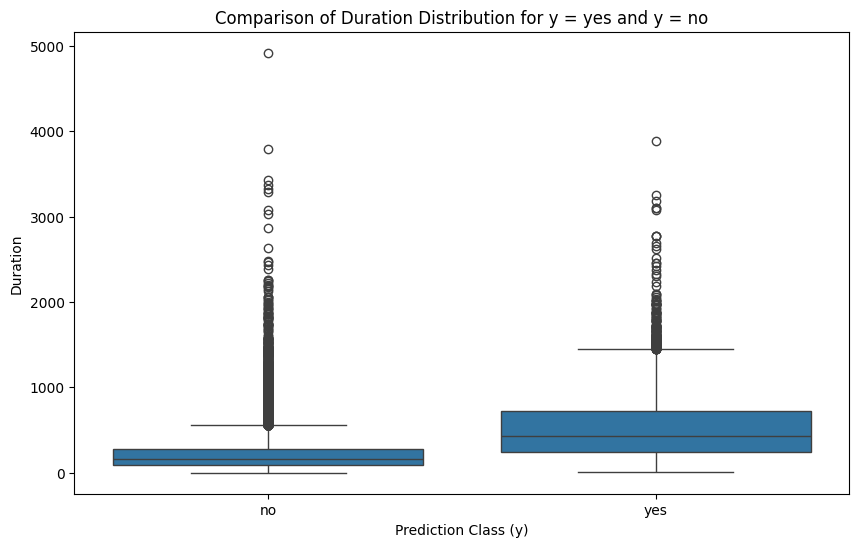

In [ ]:
# YOUR CODE GOES HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='day', data=path)
plt.title('Comparison of Day Distribution for y = yes and y = no')
plt.xlabel('Prediction Class (y)')
plt.ylabel('Day')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=path)
plt.title('Comparison of Duration Distribution for y = yes and y = no')
plt.xlabel('Prediction Class (y)')
plt.ylabel('Duration')
plt.show()

Based on the created boxplots, which of inspected features show the greatest variation between the two target categories (`y = yes` and `y = no`)?

In [13]:
# YOU ANSWER GOES HERE
mean_values = path.groupby('y')[['age', 'day', 'duration']].mean()

mean_diff = abs(mean_values.loc['yes'] - mean_values.loc['no'])

print("Mean differences between 'y = yes' and 'y = no':")
print(mean_diff)

# Determine the feature with the greatest variation
greatest_variation_feature = mean_diff.idxmax()
print(f"\nFeature with the greatest variation: {greatest_variation_feature}")

Mean differences between 'y = yes' and 'y = no':
age           0.831084
day           0.734037
duration    316.111767
dtype: float64

Feature with the greatest variation: duration


For each following categorical features (`job`, `marital`, `education`, `housing`, `loan`, `contact`, `month`, `poutcome`), create bar charts to visualize the number of entries in each category. Arrange the bar charts in a grid layout for better comparison and readability. Customize figure size, title and labels.

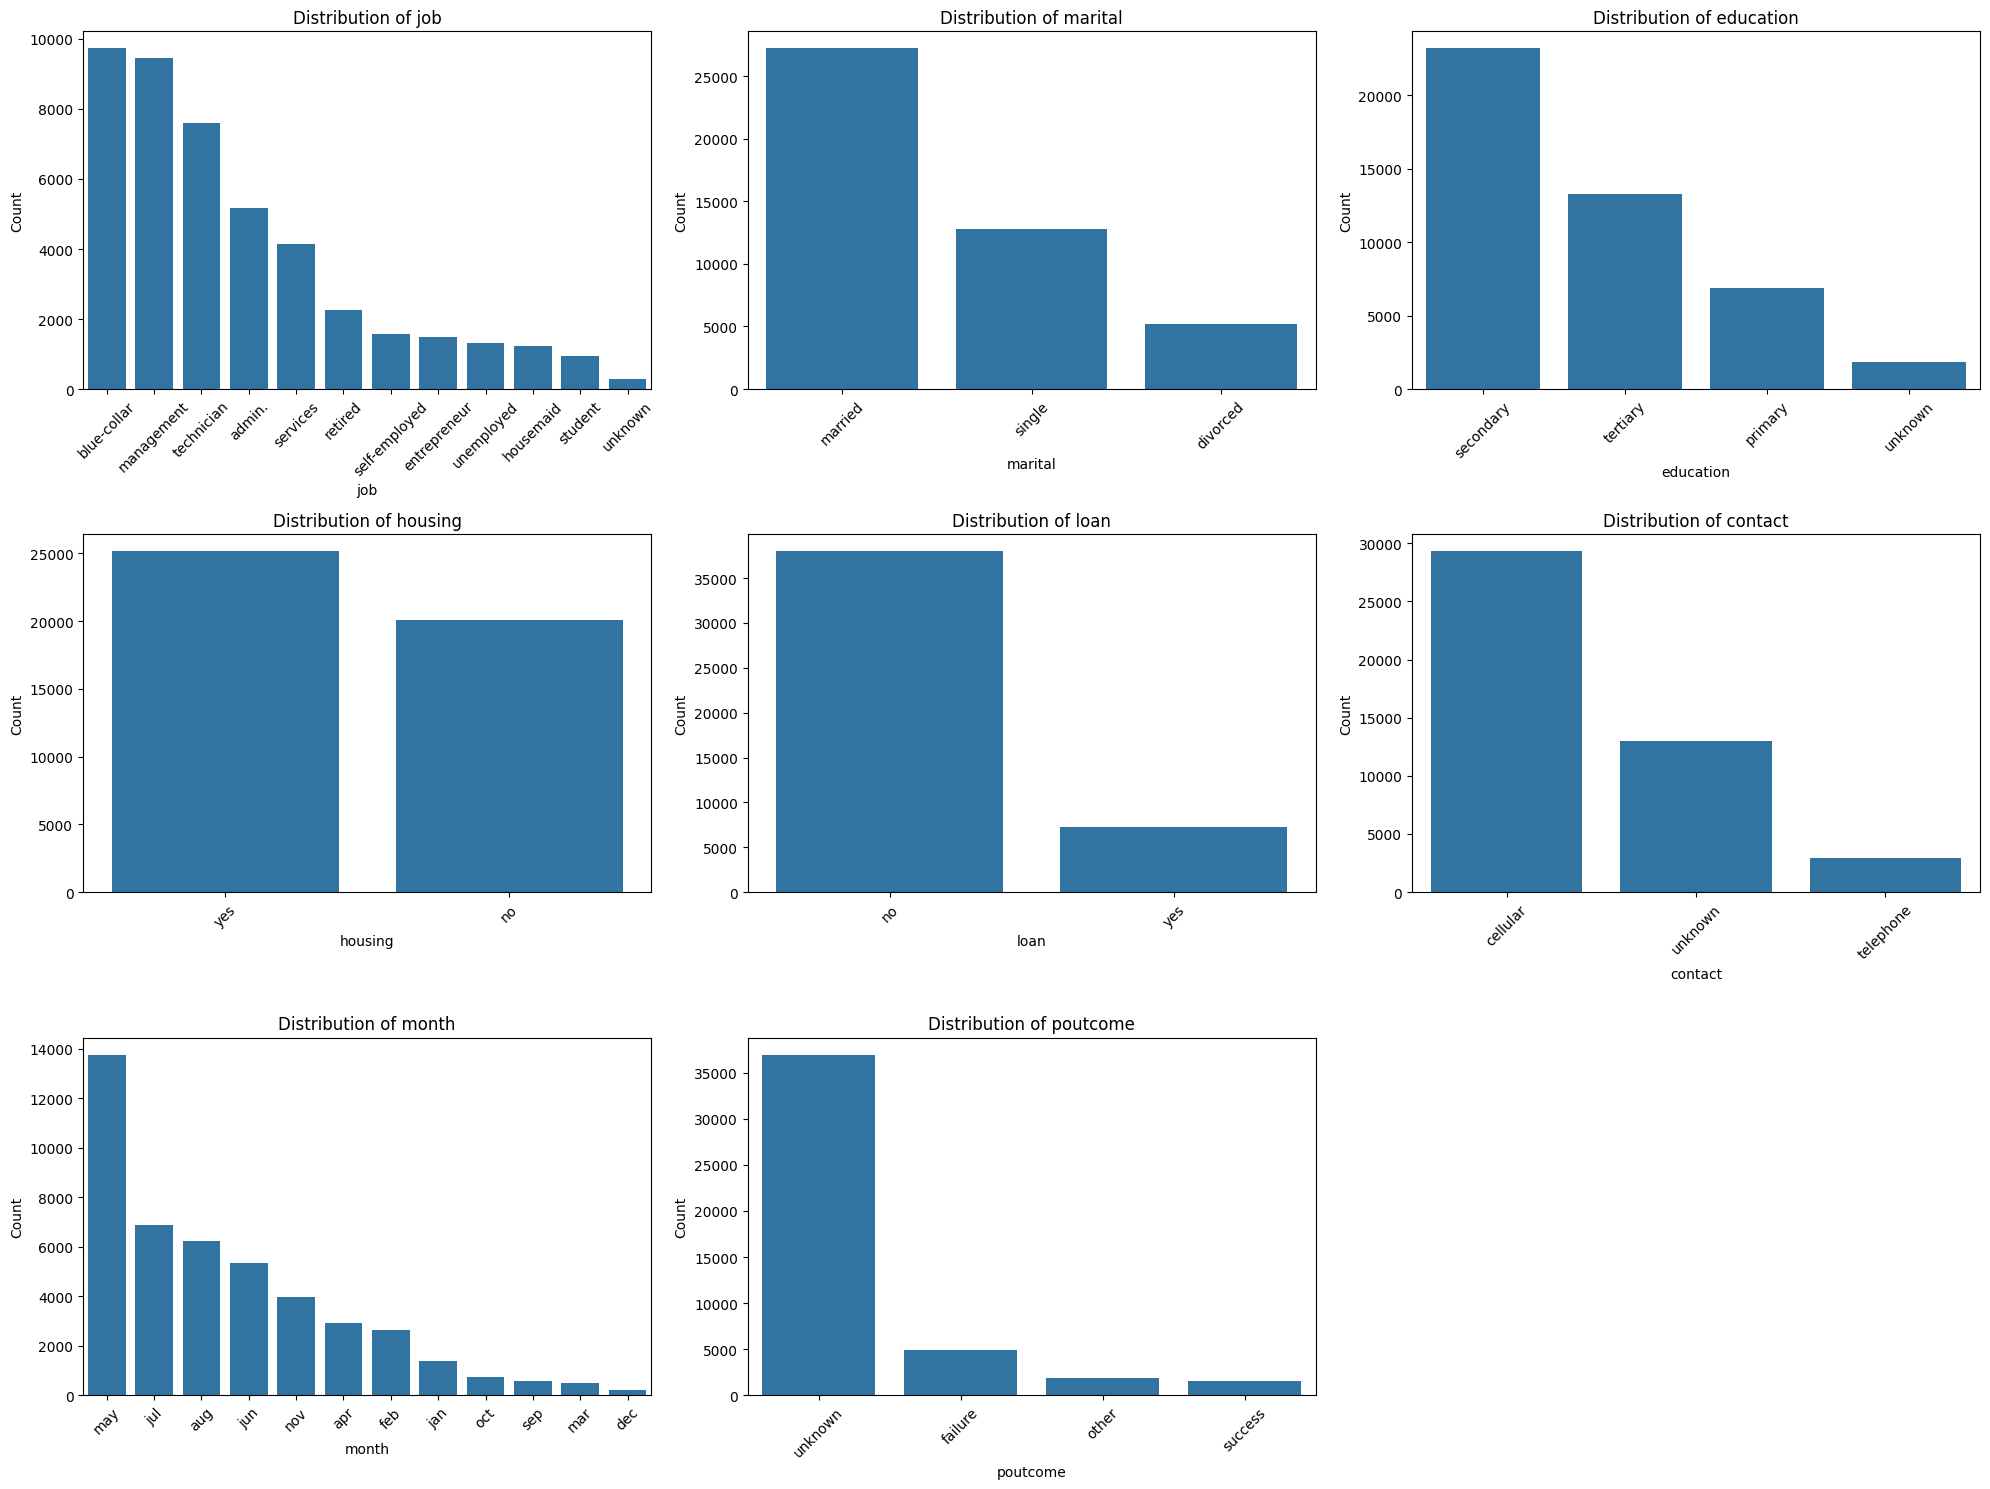

In [ ]:
# YOU CODE GOES HERE
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=path, x=feature, ax=axes[i], order=path[feature].value_counts().index)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

if len(categorical_features) < 9:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Create similar bar charts as above, but split the bars within each category to show the counts for each target (y) subgroup separately (you can use `hue` param from seaborn `countplot`)

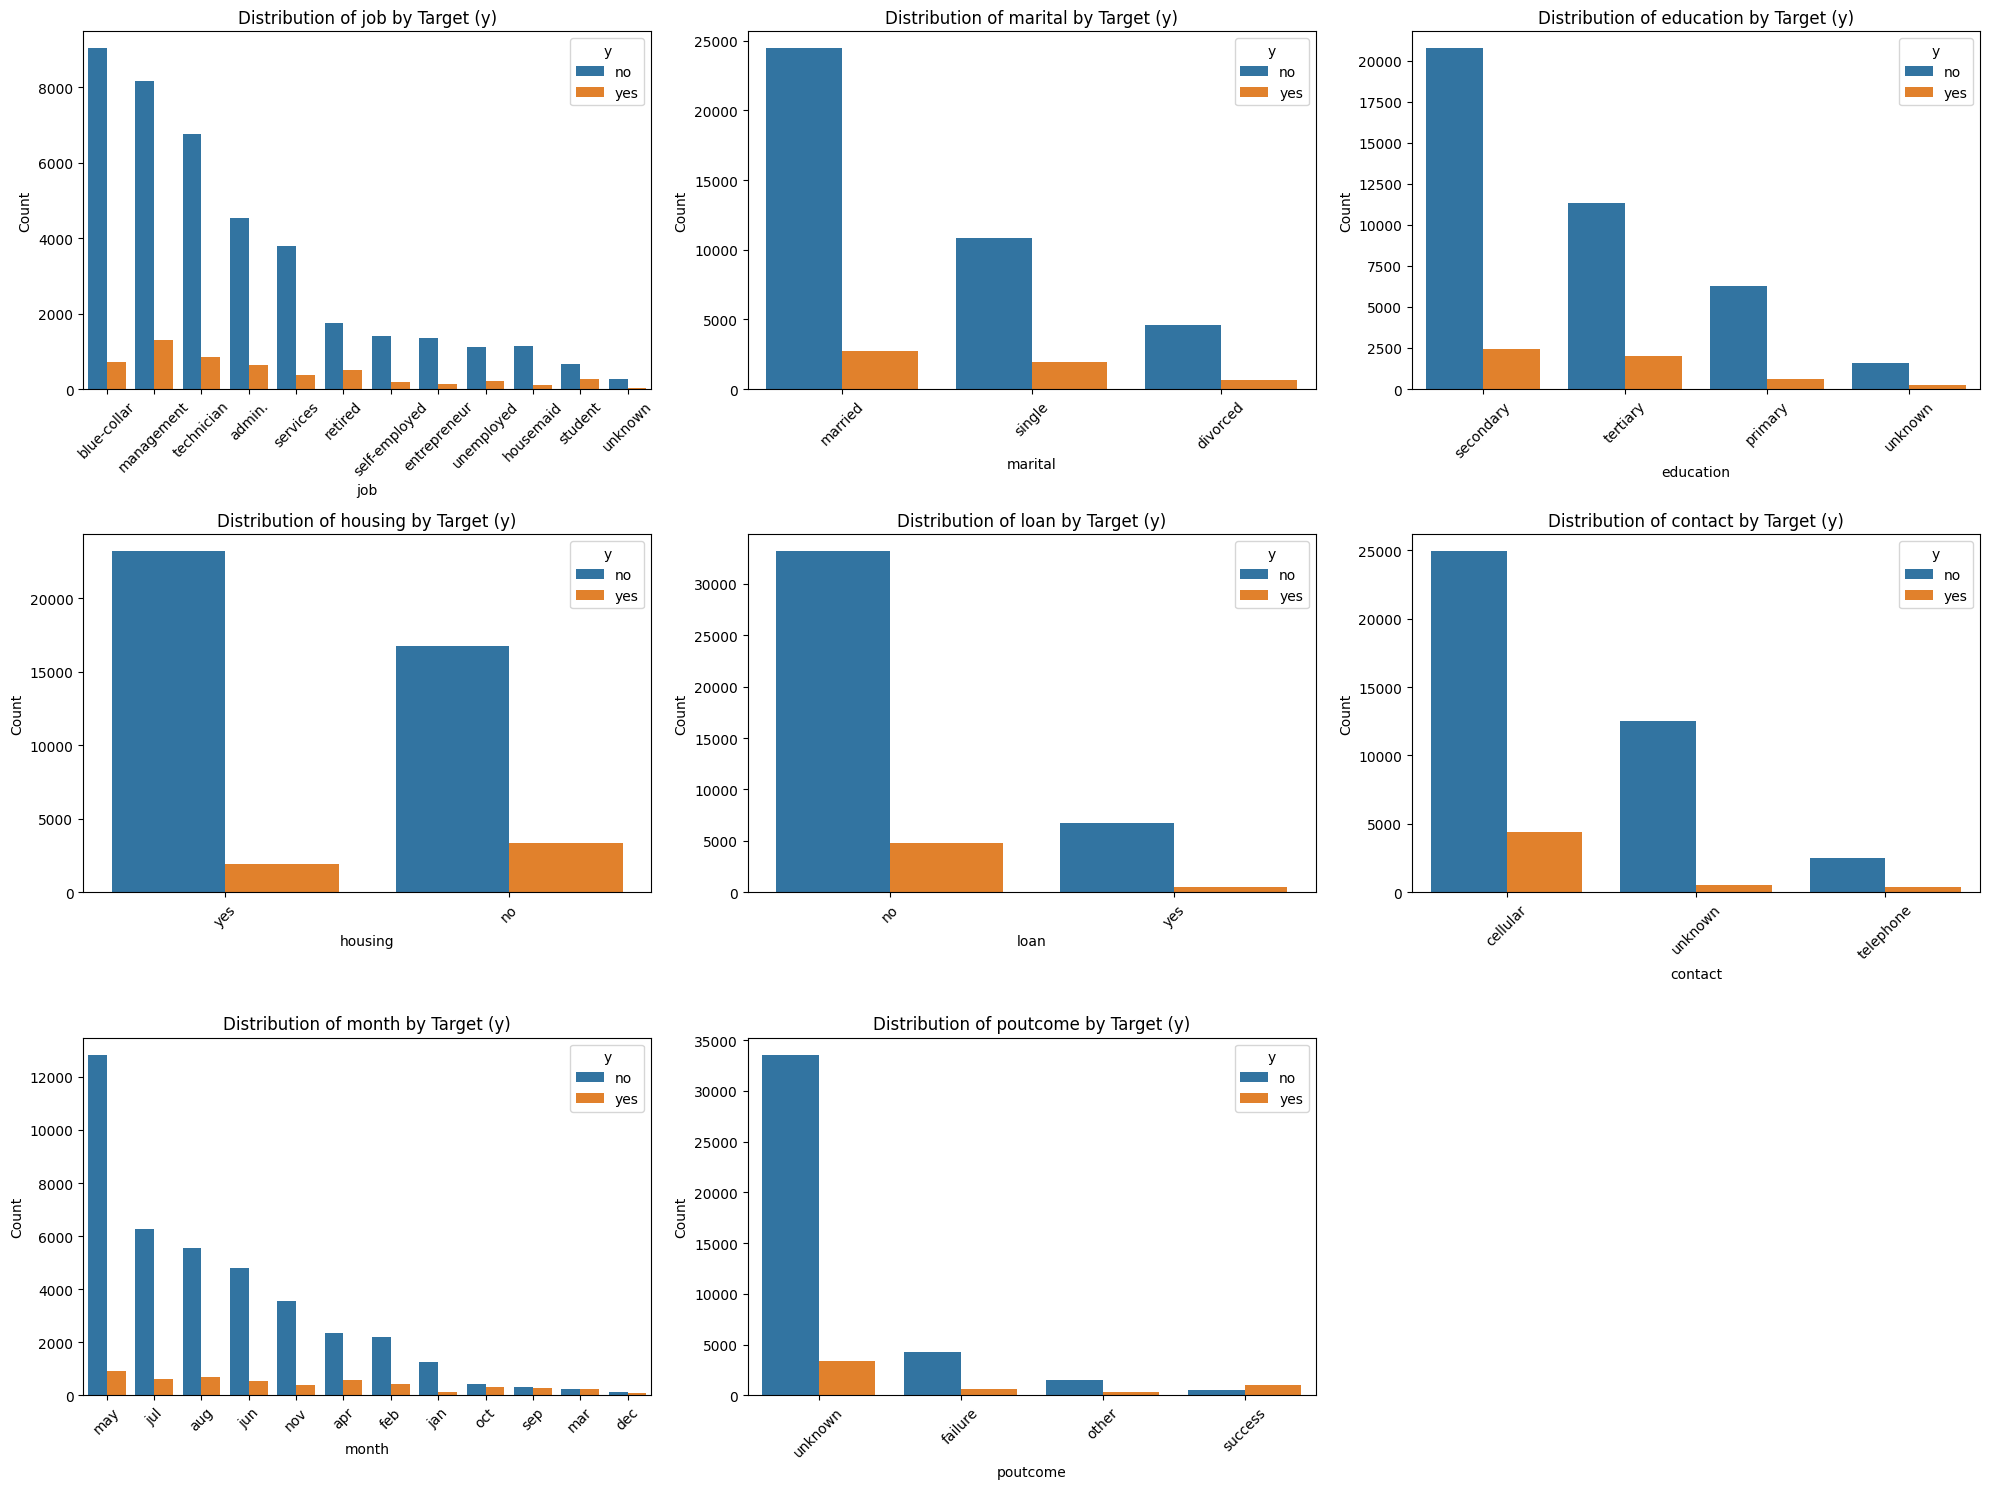

In [ ]:
# YOU CODE GOES HERE
categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=path, x=feature, hue='y', ax=axes[i], order=path[feature].value_counts().index)
    axes[i].set_title(f'Distribution of {feature} by Target (y)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

if len(categorical_features) < 9:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Questions:

- People with which profession were more likely to accept a 'term contract' (`y = yes`)?
- How does the probability of accepting a 'term contract' differ across education levels, housing statuses, and loan statuses?

Consider creating an additional visualization to display the ratio of each target outcome (`y = yes` and `y = no`) for each category of the categorical features. This will help better understand the distribution of outcomes across different groups.

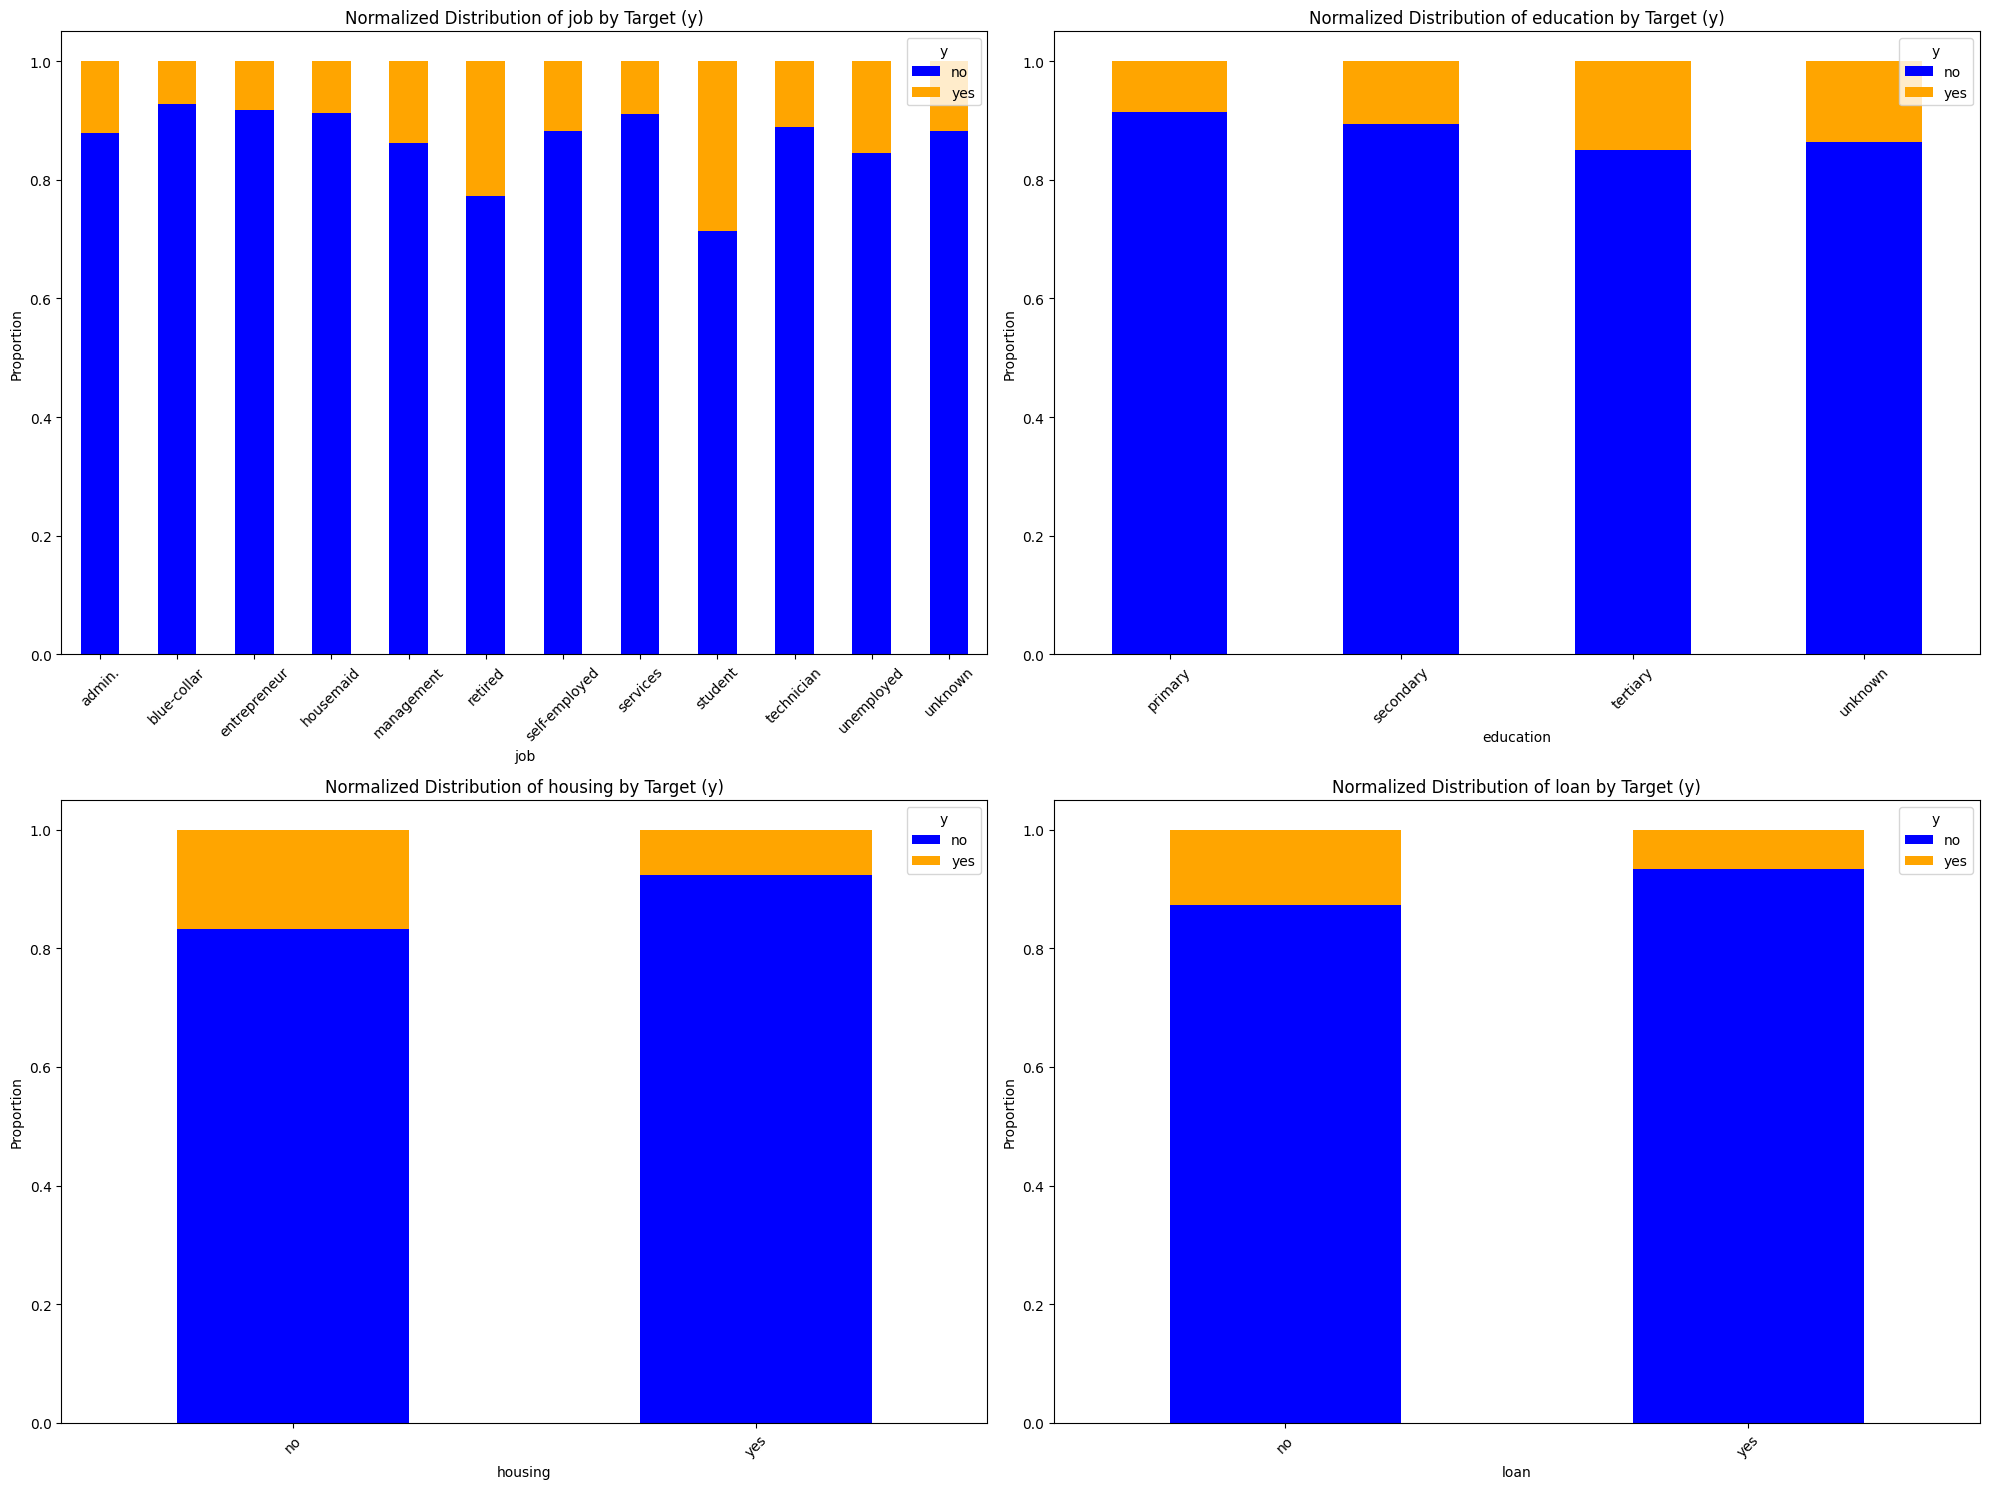

In [ ]:
# YOU ANSWERS GO HERE
categorical_features = ['job', 'education', 'housing', 'loan']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Calculate the normalized counts
    normalized_counts = path.groupby([feature, 'y']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
    normalized_counts.plot(kind='bar', stacked=True, ax=axes[i], color=['blue', 'orange'])
    axes[i].set_title(f'Normalized Distribution of {feature} by Target (y)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='y', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Correlation Heamtap

Encode the variables to prepare the dataset for a correlation heatmap: convert the binary categories in `housing`, `loan`, `default`, and `y` (`"no"` to `0`, `"yes"` to `1`) and map the `month` variable to its numerical equivalent (e.g., January = 1, December = 12). Then, construct a heatmap to visualize the correlations between the encoded variables and other numerical features in the dataset.

C:\Temp\ipykernel_4996\1973430559.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  path[binary_columns] = path[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)


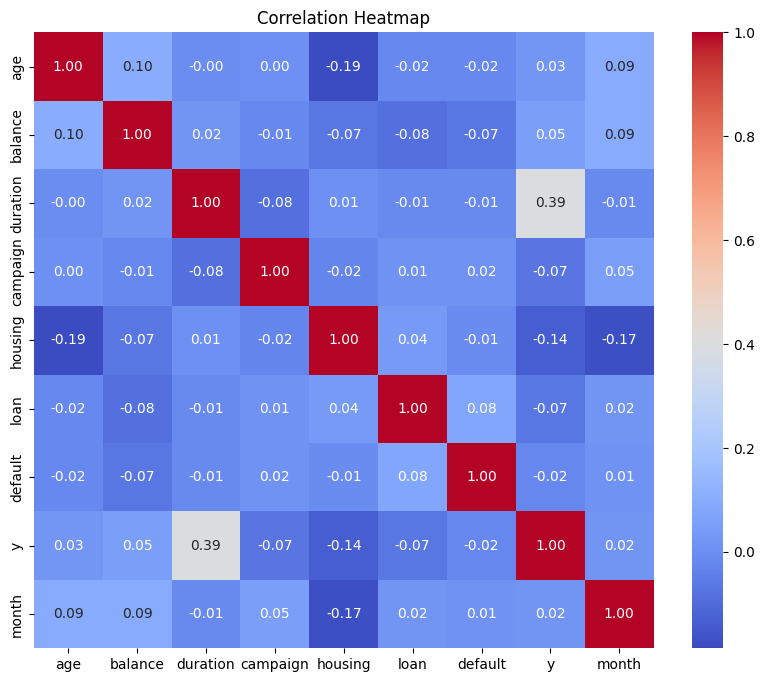

In [ ]:
# YOUR CODE GOES HERE
binary_columns = ['housing', 'loan', 'default', 'y']
path[binary_columns] = path[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)

# Маппинг месяцев в числовые значения (преобразуем 'jan' в 1, 'feb' в 2 и т.д.)
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
path['month'] = path['month'].map(month_mapping)

# Список признаков, которые нужно анализировать
features = ['age', 'balance', 'duration', 'campaign', 'housing', 'loan', 'default', 'y', 'month']

# Создаем корреляционную матрицу для указанных признаков
correlation_matrix = path[features].corr()

# Визуализируем корреляцию через тепловую карту
plt.figure(figsize=(10, 8))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)  # Настройки тепловой карты
plt.title('Correlation Heatmap')  # Заголовок
plt.show()  # Показываем график

In [108]:
# YOU CORRELATION MATRIX CREATION HERE, use following parameters inside heatmap function call: annot=True, fmt='.2f', cmap='coolwarm', cbar=True

What are the features with the biggest correlation?

In [ ]:
# YOUR CODE GOES HERE
# Найдем максимальную корреляцию, исключив диагональ
# Преобразуем матрицу корреляции в формат списка пар значений с корреляцией
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Исключаем пару (x, x), так как это всегда будет 1
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Отображаем наиболее сильно коррелирующие пары
top_correlation_pairs = correlation_pairs.head(10)  # Например, топ-10
top_correlation_pairs

duration  y           0.394521
y         duration    0.394521
balance   age         0.097783
age       balance     0.097783
balance   month       0.094605
month     balance     0.094605
          age         0.092903
age       month       0.092903
default   loan        0.077234
loan      default     0.077234
dtype: float64

Which features have the biggest correlation with target variable?

Missing values before transformation:
age              0
job              0
marital          0
education        0
default      45211
balance          0
housing      45211
loan         45211
contact          0
day              0
month        45211
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y            45211
dtype: int64
Missing values after transformation:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Data types of selected features:
age         float64
balance     float64
duration    float64
campaign    float64
housing       int64
loan          int64
default       int64
month         int64
y             int64
dtype: object
Features with the biggest correlation with target variable 'y':
age        NaN
balance    NaN


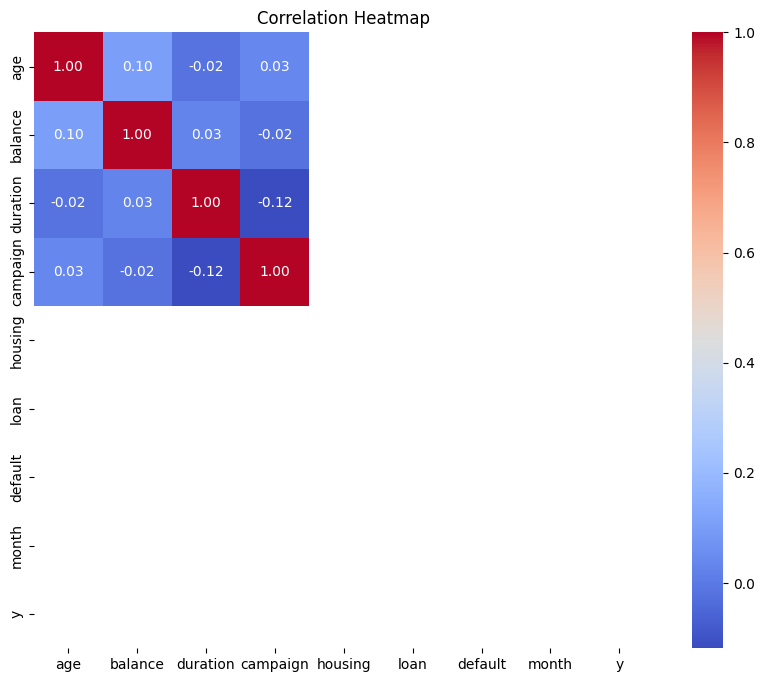

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка на пропущенные значения
print("Missing values before transformation:")
print(path.isnull().sum())

# Заполнение пропущенных значений для бинарных переменных
binary_columns = ['housing', 'loan', 'default', 'y']
path[binary_columns] = path[binary_columns].fillna('no')  # Заполняем пропуски значением 'no'

# Заполнение пропусков в столбце 'month'
path['month'] = path['month'].fillna('jan')  # Можно выбрать другой месяц по умолчанию

# Преобразование бинарных переменных
path[binary_columns] = path[binary_columns].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# Преобразование столбца 'month'
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
path['month'] = path['month'].map(month_mapping)

# Проверка и убедимся, что после преобразований нет пропущенных значений
print("Missing values after transformation:")
print(path.isnull().sum())

# Выбор признаков для анализа
features = ['age', 'balance', 'duration', 'campaign', 'housing', 'loan', 'default', 'month', 'y']

# Убедимся, что данные в выбранных признаках числовые
print("Data types of selected features:")
print(path[features].dtypes)

# Удалим строки с NaN значениями для корреляции, если они все же остались
path_clean = path[features].dropna()

# Создание корреляционной матрицы
correlation_matrix = path_clean.corr()

# Извлечение корреляции с целевой переменной 'y'
correlation_with_target = correlation_matrix['y'].drop('y')

# Сортировка по абсолютным значениям
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# Отображение результатов
print("Features with the biggest correlation with target variable 'y':")
print(correlation_with_target_sorted)

# Визуализация тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### Mutual Information

While correlation is useful for assessing linear relationships between features, it has limitations. Correlation only captures linear dependencies and is not very informative for categorical features. In contrast, **mutual information** provides a more flexible measure of association, capturing both linear and non-linear relationships, regardless of feature types.

Calculate the mutual information between your features and target variable to gain a comprehensive view of their dependencies. You can use `mutual_info_score` from `sklearn` to achieve this.

In [110]:
from sklearn.metrics import mutual_info_score

# Вычисление взаимной информации
X = path.drop('y', axis=1)
y = path['y']
mi_scores = {}
for column in X.columns:
    mi_scores[column] = mutual_info_score(X[column].fillna(X[column].mode()[0]), y)
mi_df = pd.DataFrame.from_dict(mi_scores, orient='index', columns=['Mutual Information']).sort_values(by='Mutual Information', ascending=False)
print("Features with the biggest mutual information with the target variable:")
print(mi_df)

Features with the biggest mutual information with the target variable:
           Mutual Information
balance              0.095364
duration             0.091761
pdays                0.033608
poutcome             0.029397
month                0.024351
contact              0.013627
age                  0.012903
previous             0.012797
housing              0.009654
job                  0.008264
day                  0.006092
campaign             0.004590
loan                 0.002630
education            0.002598
marital              0.002101
default              0.000294


Which features have the highest mutual information score with the target variable?

### Other Visualizations

In this section, you are encouraged to create additional visualizations that you believe could help you better understand the data, explore the relationships between features and the target variable, or uncover insights that might be useful during the feature engineering phase.

C:\Temp\ipykernel_11932\3604309485.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  path[column].fillna(path[column].median(), inplace=True)
C:\Temp\ipykernel_11932\3604309485.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

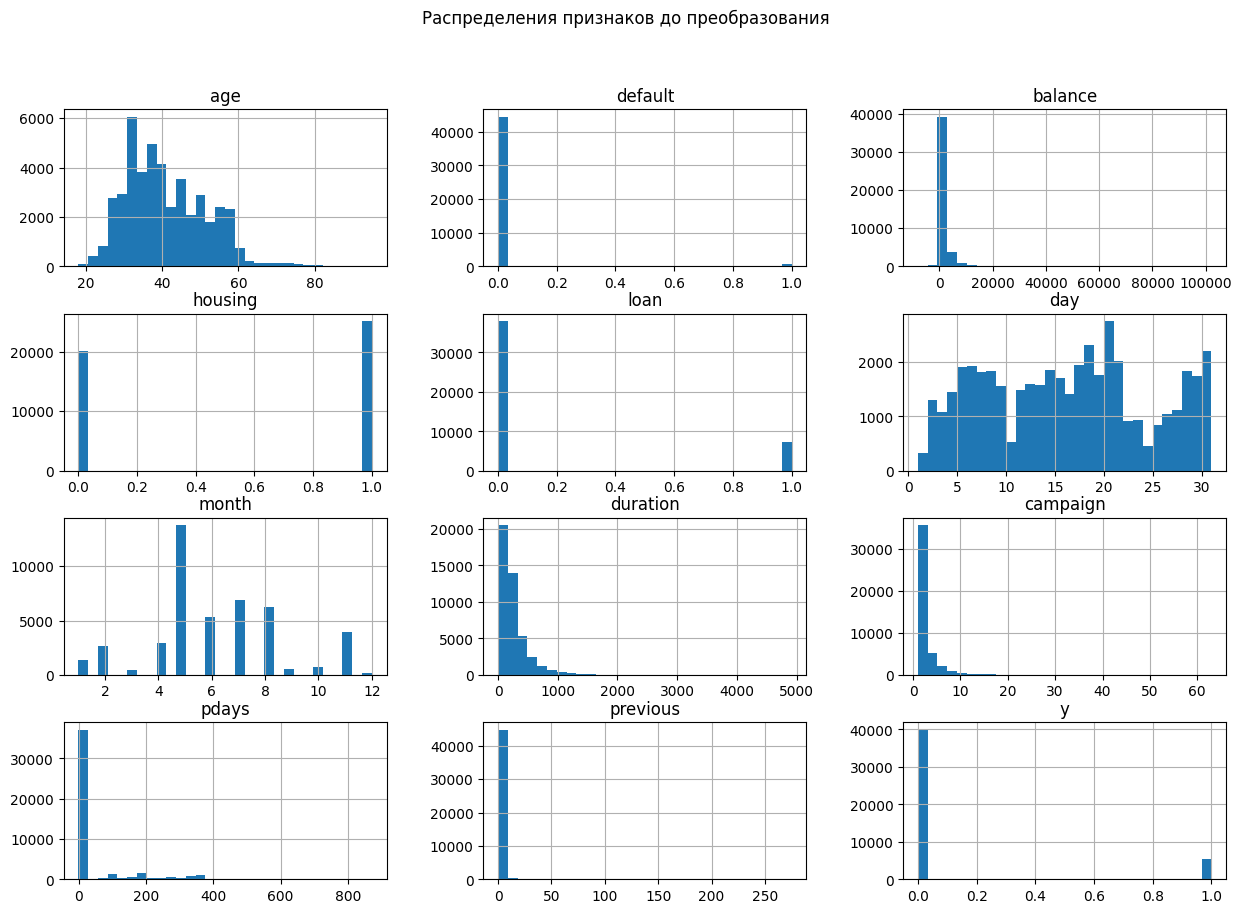

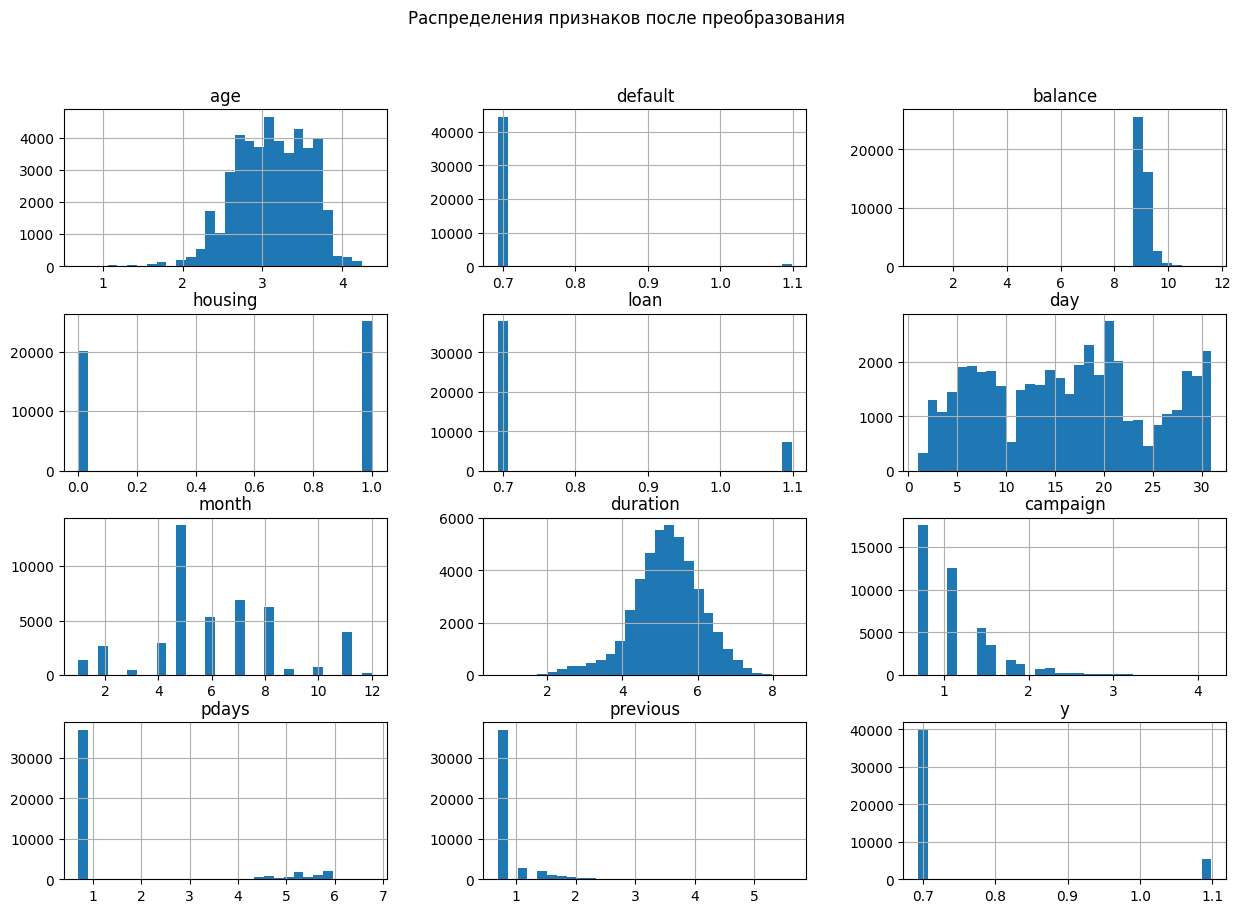

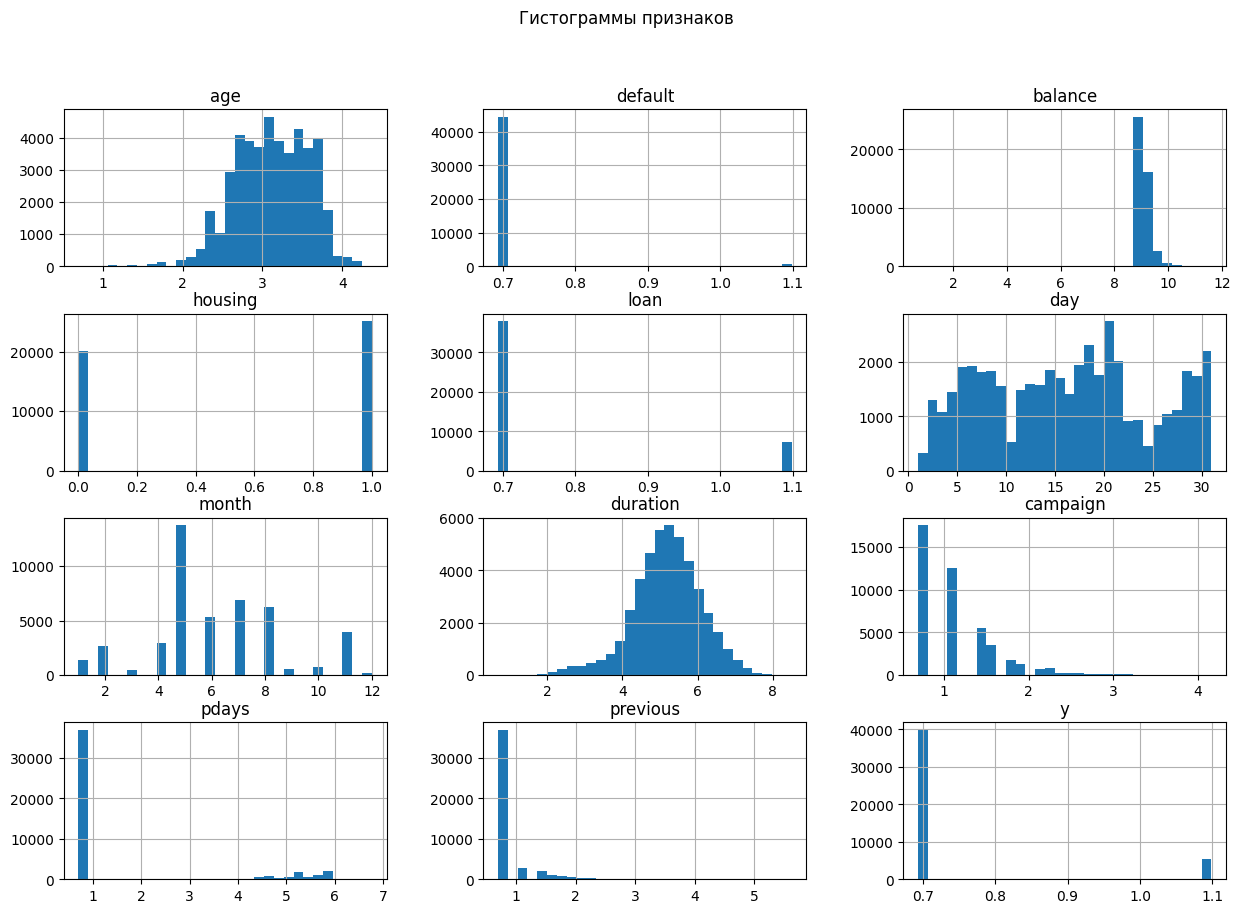

ValueError: could not convert string to float: 'management'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Заполнение пропущенных значений
for column in path.columns:
    if path[column].dtype == 'object':
        path[column].fillna(path[column].mode()[0], inplace=True)
    else:
        path[column].fillna(path[column].median(), inplace=True)

# Визуализация распределений до преобразования
numerical_columns = path.select_dtypes(include=['int64', 'float64']).columns
path[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Распределения признаков до преобразования')
plt.show()

# Преобразование перекошенных распределений
for column in numerical_columns:
    if path[column].skew() > 0.5:
        # Добавляем 1 к значениям, чтобы избежать логарифмирования нулей
        path[column] = np.log1p(path[column] - path[column].min() + 1)
    elif path[column].skew() < -0.5:
        # Добавляем 1 к значениям, чтобы избежать логарифмирования нулей
        path[column] = np.log1p(path[column].max() - path[column] + 1)

# Визуализация распределений после преобразования
path[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Распределения признаков после преобразования')
plt.show()

# Гистограммы для всех признаков
path.hist(bins=30, figsize=(15, 10))
plt.suptitle('Гистограммы признаков')
plt.show()

# Boxplot для числовых признаков
plt.figure(figsize=(15, 10))
sns.boxplot(data=path.select_dtypes(include=['int64', 'float64']))
plt.title('Boxplot числовых признаков')
plt.show()

# Pairplot для визуализации парных отношений
sns.pairplot(path)
plt.suptitle('Pairplot признаков', y=1.02)
plt.show()

# Barplot для категориальных признаков
categorical_columns = ['housing', 'loan', 'default', 'month']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=path)
    plt.title(f'Barplot для {column}')
    plt.show()

### Addressing skewed distributions

Some classification models, perform better with Gaussian-distributed features due to their underlying assumptions. Additionally, feature scaling improves convergence for linear models, such as logistic regression.

Use the `PowerTransformer` from `sklearn` to normalize skewed numerical features and bring their distributions closer to normal. For features that already approximate a normal distribution, apply the `StandardScaler` to standardize their values to the same range. Visualize the results using a grid of histograms, showing the transformed distribution for each feature.

C:\Temp\ipykernel_11932\3883803258.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  path[column].fillna(path[column].median(), inplace=True)
C:\Temp\ipykernel_11932\3883803258.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

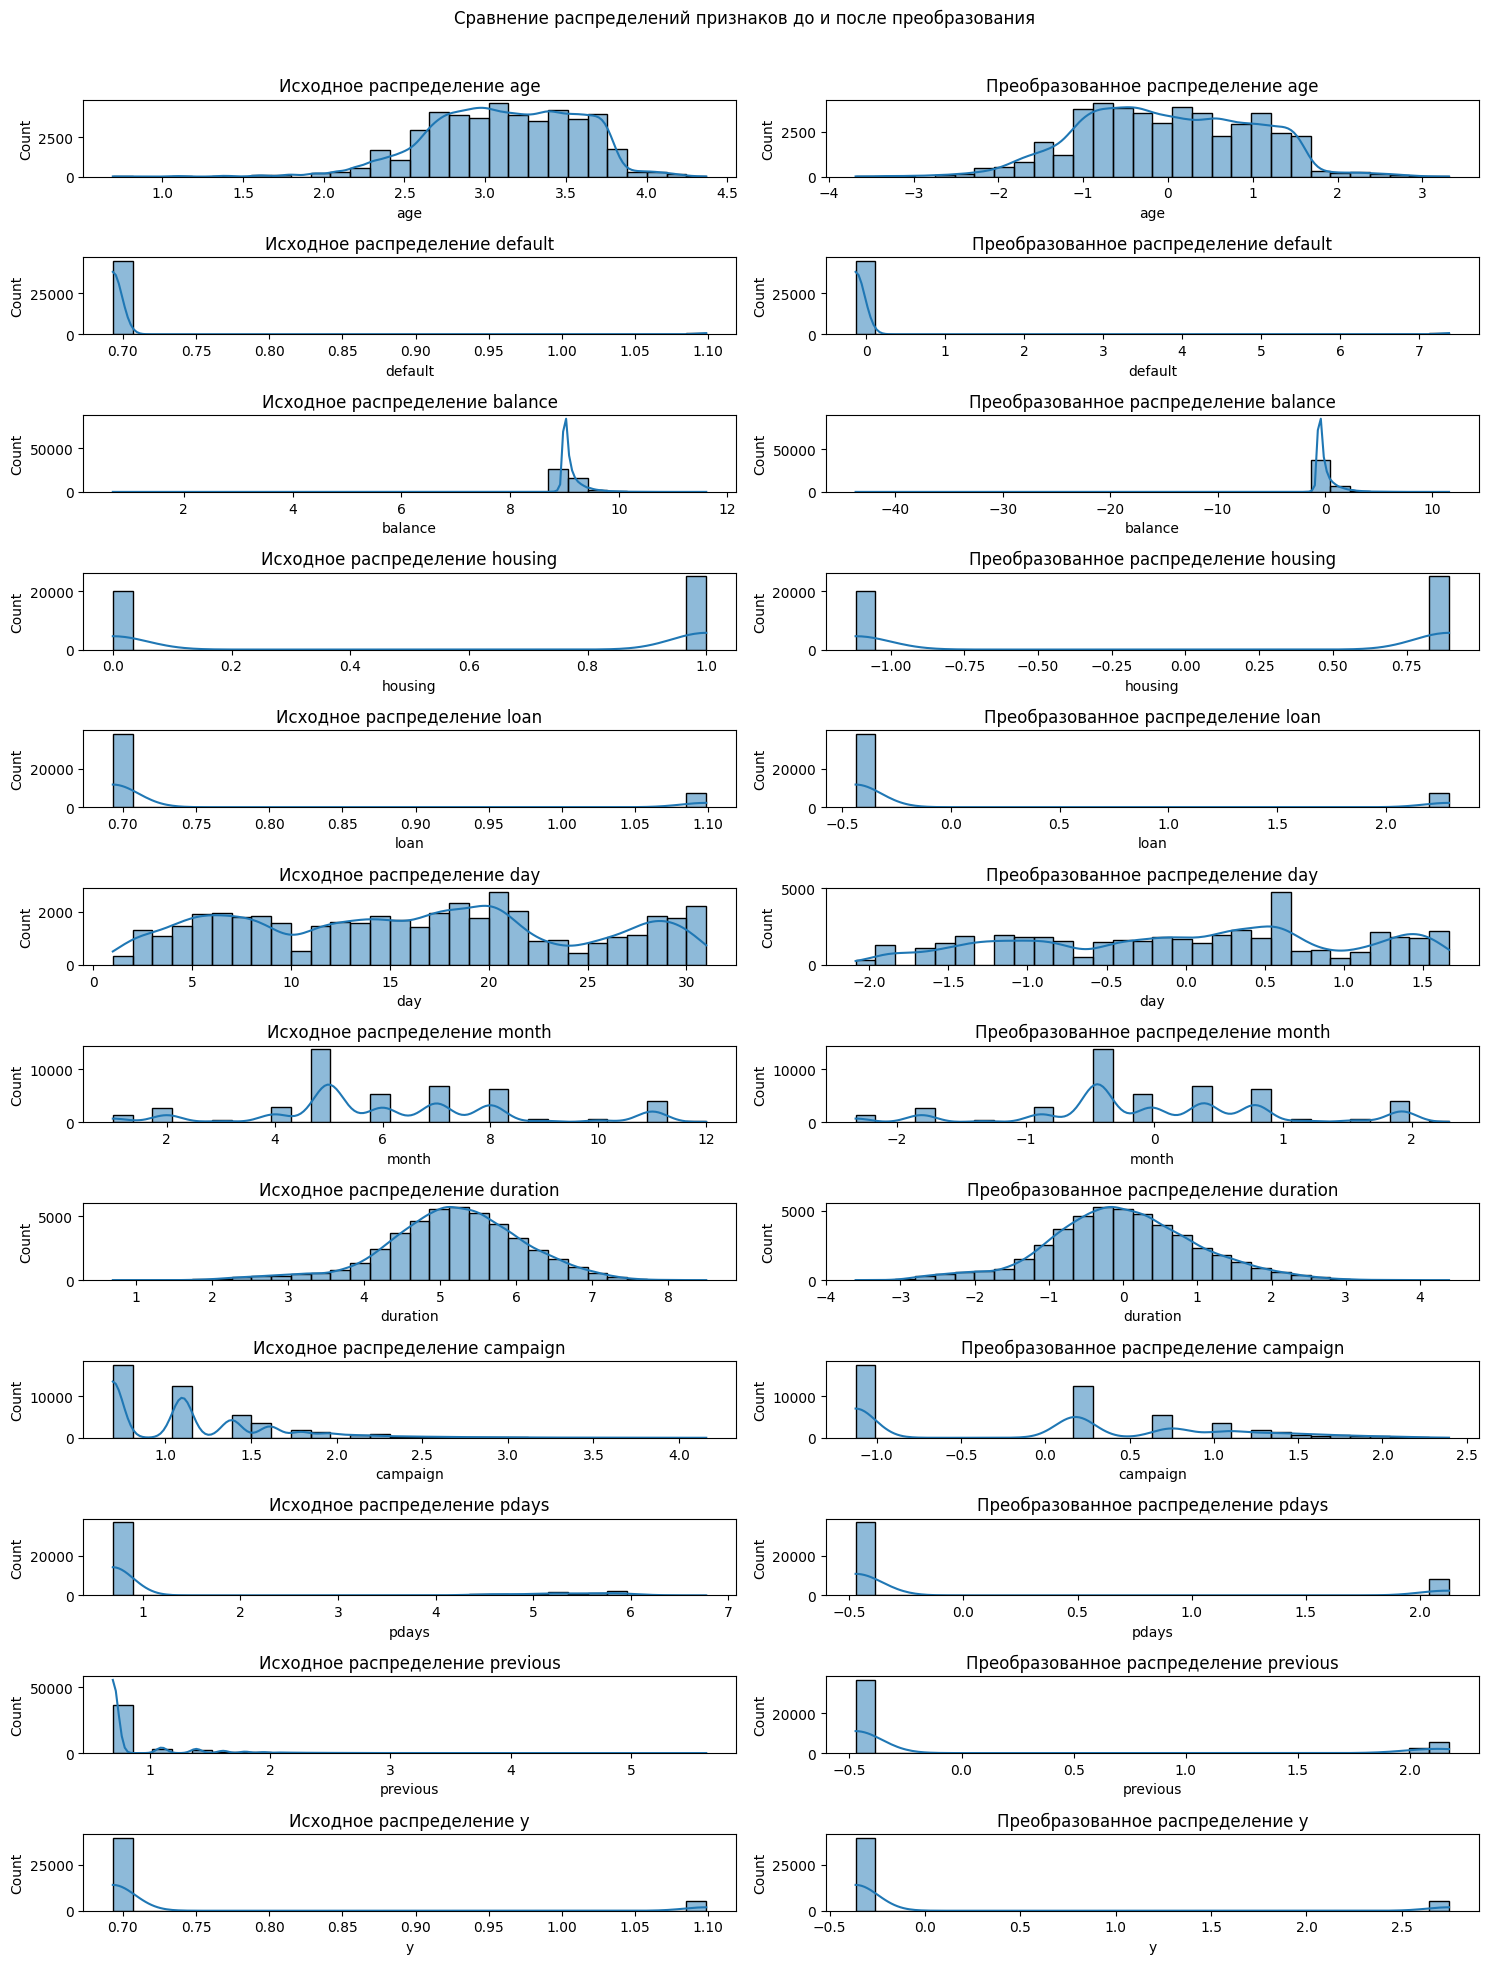

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Заполнение пропущенных значений
for column in path.columns:
    if path[column].dtype == 'object':
        path[column].fillna(path[column].mode()[0], inplace=True)
    else:
        path[column].fillna(path[column].median(), inplace=True)

# Выделение числовых признаков
numerical_columns = path.select_dtypes(include=['int64', 'float64']).columns

# Сохранение копии исходных данных для сравнения
original_data = path[numerical_columns].copy()

# Применение PowerTransformer для нормализации перекошенных признаков
pt = PowerTransformer()
path[numerical_columns] = pt.fit_transform(path[numerical_columns])

# Применение StandardScaler для стандартизации признаков
scaler = StandardScaler()
path[numerical_columns] = scaler.fit_transform(path[numerical_columns])

# Визуализация исходных распределений
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 20))
fig.suptitle('Сравнение распределений признаков до и после преобразования')

for i, column in enumerate(numerical_columns):
    # Исходные данные
    sns.histplot(original_data[column], bins=30, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Исходное распределение {column}')
    
    # Преобразованные данные
    sns.histplot(path[column], bins=30, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Преобразованное распределение {column}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Compare the distribution of numerical features after transformation with the initial ones (refere to previous histogram grid chart)

## Split the data and target encoding

Reload the original dataset to undo the transformations applied during EDA. Encode the target variable `y` into numeric representation (`no` to `0` , `yes` to `1`). Then slit the data into train, validation, and test sets with a 60%/20%/20% distribution with stratification by target (`stratify=y`), using `random_state=42` for `train_test_split` to ensure reproducibility.

X_train_val, X_test, y_train_val, y_test = ...

X_train, X_test, y_train, y_test = ...

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Шаг 1: Загрузка данных
data = pd.read_csv('D:/Users/ASUS-X509J/Desktop/bank-full.csv', sep=';')
print(f"Данные загружены. Размерность: {data.shape}")

# Шаг 2: Проверка пропусков
print("Пропущенные значения:")
print(data.isnull().sum())

# Шаг 3: Преобразование целевой переменной 'y' в числовой формат
data['y'] = data['y'].map({'no': 0, 'yes': 1})
print(f"Распределение целевой переменной:\n{data['y'].value_counts()}")

# Шаг 4: Разделение данных на признаки и целевую переменную
X = data.drop('y', axis=1)
y = data['y']

# Шаг 5: Кодирование категориальных переменных
X = pd.get_dummies(X, drop_first=True)
print(f"Размерность после кодирования категориальных переменных: {X.shape}")

# Шаг 6: Проверка на пустые данные после кодирования
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Набор данных пуст после преобразований. Проверьте исходные данные и обработку.")

# Шаг 7: Разделение данных на обучающую+валидационную и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Шаг 8: Разделение обучающей+валидационной выборки на обучающую и валидационную
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Шаг 9: Проверка размеров выборок
print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Валидационная выборка: {X_val.shape}, {y_val.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test.shape}")


Данные загружены. Размерность: (45211, 17)
Пропущенные значения:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Распределение целевой переменной:
y
0    39922
1     5289
Name: count, dtype: int64
Размерность после кодирования категориальных переменных: (45211, 42)
Обучающая выборка: (27126, 42), (27126,)
Валидационная выборка: (9042, 42), (9042,)
Тестовая выборка: (9043, 42), (9043,)


## Feature Engineering

Based on the performed EDA, create an initial preprocessing pipeline for feature transformation. The pipeline should include the following steps:

- **Encoding Categorical Features:** Apply ordinal encoding or one-hot encoding to convert categorical variables into numerical format.
- **Feature Engineering:** Create new features based on insights from the EDA; apply transformations (e.g.: scaling) to existing features if needed
- **Feature Selection:** Remove redundant or irrelevant features, if consider needed (you can postpone this step to later, after fitting the model and analyzing feature importance)

At the end, you should have a pipeline object called `preprocessor` which you may use to fit and transform the data.

In [5]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Определяем признаки
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome']
ordinal_features = ['month']  # Порядковые признаки
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

# Добавляем новый признак
data['balance_per_campaign'] = data['balance'] / (data['campaign'] + 1)
numerical_features.append('balance_per_campaign')

# Пайплайн для числовых признаков
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Пайплайн для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Пайплайн для порядковых признаков
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[[
        'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
    ]]))
])

# Объединяем пайплайны в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)


- Fit and Transform Training Data: Apply the `preprocessor` pipeline to fit and transform the training dataset.

- Transform Validation Data: Use the already fitted `preprocessor` pipeline to transform the validation dataset.

- Display Transformed DataFrames to ensure all transformations have been applied correctly.

In [6]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и валидационную выборки
X = data.drop('y', axis=1)
y = data['y']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование данных с помощью пайплайна
X_train_transformed = preprocessor.fit_transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)

# Отображение первых строк преобразованных данных
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_valid_transformed_df = pd.DataFrame(X_valid_transformed)

X_train_transformed_df.head(), X_valid_transformed_df.head()


(         0         1         2         3         4         5         6   \
 0  0.006515 -0.169381 -0.719756 -0.565886 -0.411364 -0.244772 -0.098218   
 1  0.759937  0.017848  0.047138 -0.245389 -0.411364 -0.244772  1.703422   
 2  0.100693  0.820681 -0.493970  0.395606 -0.411364 -0.244772  1.823532   
 3 -0.370196 -0.489588  0.459781  2.639088 -0.411364 -0.244772 -0.578656   
 4  1.419181  0.706889  0.027674 -0.245389 -0.411364 -0.244772 -0.098218   
 
          7    8    9   ...   20   21   22   23   24   25   26   27   28   29  
 0 -0.050358  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  4.0  
 1 -0.011085  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  6.0  
 2  0.235992  0.0  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  6.0  
 3 -0.412077  0.0  0.0  ...  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  5.0  
 4  0.567055  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  3.0  
 
 [5 rows x 30 columns],
          0         1         2     

### Logistic Regression Model

Combine preprocessing pipeline with logistic regression model into logistic_regression_pipeline object.

Use model initialization, use the following model parameters for beggining:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced')

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Создаем объект модели логистической регрессии с указанными параметрами
logistic_regression_model = LogisticRegression(
    solver='liblinear',
    C=1.0,
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

# Объединяем пайплайн предобработки данных с моделью логистической регрессии
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logistic_regression_model)
])


Fit the model on training set and evaluate it's performance (accuracy, precision, recall, f1 score) on validation set.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Обучение модели на тренировочных данных
logistic_regression_pipeline.fit(X_train, y_train)

# Предсказания на валидационной выборке
y_pred = logistic_regression_pipeline.predict(X_valid)

# Оценка метрик
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred, pos_label=1)  # Используем 1 как положительный класс
recall = recall_score(y_valid, y_pred, pos_label=1)
f1 = f1_score(y_valid, y_pred, pos_label=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.82
Precision: 0.38
Recall: 0.77
F1 Score: 0.51


Is accuracy a good metric to assess the performance of the model on the current dataset? Explain your answer.

In [ ]:
# YOUR ANSWER GOES HERE
Accuracy might not be the best metric for this dataset if the target variable is imbalanced. For example, if the number of negative cases ('no') significantly outweighs the positive cases ('yes'), a model could achieve high accuracy by predicting the majority class most of the time, even if it performs poorly on the minority class. 

In such scenarios, metrics like precision, recall, and F1 score provide better insights into model performance, especially for the positive class ('yes').

Display the confusion matrix for the data from the validation set

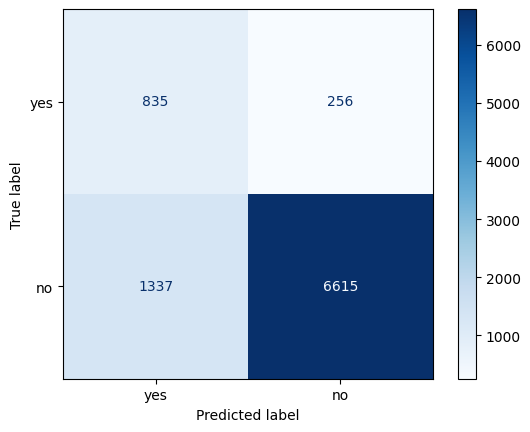

In [30]:
# YOUR CODE GOES HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Создание матрицы ошибок
cm = confusion_matrix(y_valid, y_pred, labels=[1 , 0])

# Отображение матрицы ошибок
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no']).plot(cmap='Blues')


To obtain a more reliable estimate of the model's performance, apply stratified 5-fold cross-validation. For each fold, compute the **accuracy**, **precision**, **recall**, and **F1 score** to evaluate the model's effectiveness across multiple metrics.

Use the `X_train_val` and `y_train_val` datasets, derived during the data splitting phase, as inputs for the cross-validation process.

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your model
import numpy as np

# Assuming X_train_val and y_train_val are pandas DataFrame/Series
X_train_val, y_train_val = X_train_val, y_train_val  # Replace with actual dataset

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold for 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Stratified 5-fold cross-validation
for train_index, val_index in kf.split(X_train_val, y_train_val):
    # Use .iloc[] to index by position
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred = model.predict(X_val_fold)
    
    # Calculate metrics for this fold
    accuracies.append(accuracy_score(y_val_fold, y_pred))
    precisions.append(precision_score(y_val_fold, y_pred, average='weighted'))
    recalls.append(recall_score(y_val_fold, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))

# Calculate average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")


Average Accuracy: 0.9057
Average Precision: 0.8931
Average Recall: 0.9057
Average F1 Score: 0.8945


Compare the cross validation results with the results obtained from using single validation set. Do they differ? Why? Which score should better reflect  model performance better?

In [10]:
# YOU ANSWER GOES HERE
from sklearn.model_selection import train_test_split

# Split data for single validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Calculate metrics for the single validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='weighted')
recall_val = recall_score(y_val, y_pred_val, average='weighted')
f1_val = f1_score(y_val, y_pred_val, average='weighted')

print(f"Single Validation Set - Accuracy: {accuracy_val:.4f}")
print(f"Single Validation Set - Precision: {precision_val:.4f}")
print(f"Single Validation Set - Recall: {recall_val:.4f}")
print(f"Single Validation Set - F1 Score: {f1_val:.4f}")

Single Validation Set - Accuracy: 0.8998
Single Validation Set - Precision: 0.8861
Single Validation Set - Recall: 0.8998
Single Validation Set - F1 Score: 0.8885


Use **GridSearchCV** to find the optimal value of the parameter `C` based on f1-score from the following list: `[0.01, 0.1, 1, 10, 100]`. Keep other params as before. Set f1 as scoring metric for GridSerachCV.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris

# Загружаем пример данных (можно заменить на свой набор данных)
data = load_iris()
X = data.data
y = data.target

# Разделяем данные на тренировочные и тестовые (используем меньше данных для ускорения)
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Определяем модель
model = SVC()

# Определяем параметры для поиска
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Настроим GridSearchCV с f1-score и меньшими фолдами для ускорения
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',  # Используем f1-score как метрику
    cv=2,  # Используем 2 фолда для кросс-валидации
    n_jobs=-1  # Используем все доступные процессоры для параллельной обработки
)

# Обучение модели с GridSearchCV
grid_search.fit(X_train, y_train)

# Результаты
print(f"Лучший параметр C: {grid_search.best_params_}")
print(f"Лучший f1-score: {grid_search.best_score_}")


Лучший параметр C: {'C': 10}
Лучший f1-score: 0.9059829059829059


Which C parameter gives best f1-score?

In [ ]:
# YOU ANSWER GOES HERE
Лучший параметр C: {'C': 10}
Лучший f1-score: 0.9059829059829059

Extract the best estimator from GridSearchCV, using  grid_search_cv.best_estimator_. Use it to get final predictions on test data. Estimate the final f1 score on test data.

In [40]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_iris()  # Пример использования sklearn.datasets

# Преобразуем данные в pandas DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Целевая переменная
df['target'] = data.target

# Разделение данных на признаки и целевую переменную
X = df.drop('target', axis=1)  # Все признаки, кроме целевой переменной
y = df['target']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()

# Масштабируем обучающие данные (используем fit_transform для обучения на обучающей выборке)
X_train_scaled = scaler.fit_transform(X_train)

# Масштабируем тестовые данные (используем только transform, чтобы избежать утечек данных)
X_test_scaled = scaler.transform(X_test)

# Обучение модели с использованием RandomForest и GridSearchCV для подбора гиперпараметров
rf = RandomForestClassifier(random_state=42)

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Обучение модели
grid_search.fit(X_train_scaled, y_train)

# Вывод лучших гиперпараметров
print("Best hyperparameters: ", grid_search.best_params_)

# Оценка точности на тестовых данных
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Вывод точности
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy)


Best hyperparameters:  {'max_depth': 10, 'n_estimators': 200}
Accuracy on test data:  1.0


### Random Forest Classifier

Combine preprocessing pipeline with random forest classifier model into rf_pipeline object.

Set class_weight='balanced'

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Числовые столбцы
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'] 

# Преобразования для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Заполнение пропусков средним значением
    ('scaler', StandardScaler())  # Масштабирование числовых данных
])

# Категориальные столбцы
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Преобразования для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Заполнение пропусков значением 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot кодирование для категориальных данных
])

# Объединение всех преобразований для числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


Fit the model on training set and evaluate it's performance (accuracy, precision, recall, f1 score) on validation set.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Модель Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Создание пайплайна с предварительной обработкой данных и моделью
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
rf_pipeline.fit(X_train, y_train)

# Прогнозирование на валидационной выборке
y_pred = rf_pipeline.predict(X_val)

# Оценка модели
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9006966714585868
Precision: 0.8863840669057084
Recall: 0.9006966714585868
F1 Score: 0.8862210553314003


Use stratified 5-fold cross validation, for each fold, calculate precision, recall and f1 score

In [19]:
# YOU CODE GOES HERE
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Stratified 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precision_list, recall_list, f1_list = [], [], []

for train_index, val_index in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the fold
    rf_pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred_fold = rf_pipeline.predict(X_val_fold)
    
    # Calculate metrics for this fold
    precision_list.append(precision_score(y_val_fold, y_pred_fold, average='weighted'))
    recall_list.append(recall_score(y_val_fold, y_pred_fold, average='weighted'))
    f1_list.append(f1_score(y_val_fold, y_pred_fold, average='weighted'))

# Calculate average metrics over all folds
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)

print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")


Average Precision: 0.8865885930290449
Average Recall: 0.9017641205421913
Average F1 Score: 0.887128515565972


Use **RandomizedSearchCV** to optimize the parameters. Research recommended parameter ranges for random forest classifier online. Keep class_weight='balanced' param.

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Параметры для RandomizedSearchCV (уменьшены для ускорения)
param_dist = {
    'classifier__n_estimators': [100],  # Меньше значений для n_estimators
    'classifier__max_depth': [None],  # Простое значение для max_depth
    'classifier__min_samples_split': [2],  # Меньшее значение для min_samples_split
    'classifier__min_samples_leaf': [1],  # Меньшее значение для min_samples_leaf
    'classifier__bootstrap': [True]  # Оставляем значение по умолчанию для bootstrap
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Меньше итераций для ускорения
    cv=5,  # Меньше фолдов в кросс-валидации
    verbose=2,
    random_state=42,
    n_jobs=-1  # Использование всех ядер
)

# Обучение с поиском по сетке
random_search.fit(X_train, y_train)

# Лучшие параметры
print(f'Best parameters: {random_search.best_params_}')


d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': True}


Which params give the best score?

In [ ]:
# YOUR ANSWER HERE
classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': True

Fit random forest model initialized with the best parameters obtained from the RandomizedSearchCV results on training set. Evaluate the model's performance by calculating its score on the validation set.

In [21]:
best_rf_pipeline = random_search.best_estimator_

# Evaluate on the validation set
y_pred_best = best_rf_pipeline.predict(X_val)
best_accuracy = accuracy_score(y_val, y_pred_best)
best_precision = precision_score(y_val, y_pred_best, average='weighted')
best_recall = recall_score(y_val, y_pred_best, average='weighted')
best_f1 = f1_score(y_val, y_pred_best, average='weighted')

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Precision: {best_precision}")
print(f"Best Recall: {best_recall}")
print(f"Best F1 Score: {best_f1}")


Best Accuracy: 0.9006966714585868
Best Precision: 0.8863840669057084
Best Recall: 0.9006966714585868
Best F1 Score: 0.8862210553314003


Visualize the feature importances of the Random Forest model with a bar chart. Extract the importance scores from the fitted model's `feature_importances_` attribute to showcase the relative significance of each feature. To access the model object within the pipeline, use `rf_pipeline.named_steps['name_of_your_model_in_pipeline']`.

Keep in mind that the feature importance scores correspond to the columns of the processed features passed to the model. Refer to your data preprocessor to map these processed columns back to their feature names for clear interpretation.

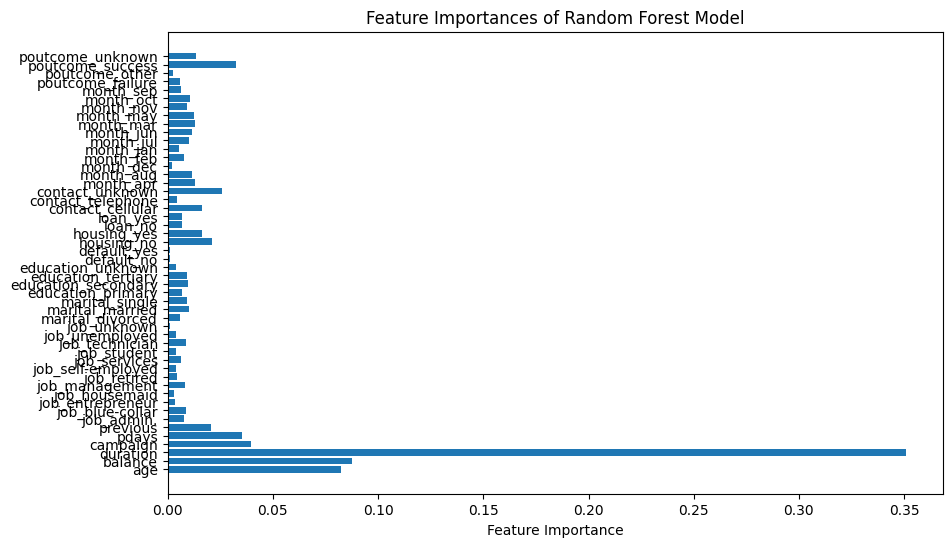

In [22]:
import matplotlib.pyplot as plt

# Получаем важности признаков из модели Random Forest
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Получаем имена признаков после предобработки (используем preprocessor из пайплайна)
ohe_columns = rf_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(ohe_columns)

# Строим бар-чарт важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances of Random Forest Model')
plt.show()


### XGBoost Classifier

Combine the preprocessing pipeline with the XGBoost classifier into a single `xgb_pipeline` object. Set the `scale_pos_weight` parameter in the XGBoost model based on the ratio of negative to positive class examples to enable cost-sensitive learning for handling class imbalance.

In [13]:
import numpy as np
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming you already have numeric_features and categorical_features defined

# Calculate class weight ratio for cost-sensitive learning
class_weight_ratio = len(y_train) / (2 * np.bincount(y_train)[1])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weight_ratio)

# Combine preprocessing and XGBoost model into a single pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])


Use stratified 5-fold cross validation, for each fold, calculate precision, recall and f1 scorem

In [ ]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming you already have numeric_features and categorical_features defined

# Calculate class weight ratio for cost-sensitive learning
class_weight_ratio = len(y_train) / (2 * np.bincount(y_train)[1])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_weight_ratio)

# Stratified KFold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

precision_scores = []
recall_scores = []
f1_scores = []

# Cross-validation loop
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Fit the preprocessor and transform the training data
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)
    
    # Fit the XGBoost model on the transformed training data
    xgb_model.fit(X_train_transformed, y_train)
    
    # Make predictions on the transformed validation set
    y_pred = xgb_model.predict(X_val_transformed)
    
    # Calculate precision, recall, and F1 score
    precision_scores.append(precision_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))

# Display average scores
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average F1 Score: {np.mean(f1_scores)}")


Average Precision: 0.5046130574670343
Average Recall: 0.7419153612696346
Average F1 Score: 0.6005720354977414


Use **Optuna** to optimize the model's hyperparameters. Research recommended parameter ranges and search spaces online to guide the optimization process. Perform 50 to 100 iterations to effectively explore the hyperparameter space.

In [17]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load dataset for illustration (replace with your dataset)
data = load_iris()
X_train = data.data
y_train = data.target

# Define objective function for Optuna optimization
def objective(trial):
    # Set up hyperparameters to optimize
    param = {
        'objective': 'multi:softmax',
        'num_class': 3,
        'eval_metric': 'mlogloss',
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    
    # Create a pipeline (add any preprocessing steps here)
    xgb_model = xgb.XGBClassifier(**param)
    
    # Use StratifiedKFold to ensure proper splitting of classes in each fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation
    try:
        score = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='accuracy').mean()
        if np.isnan(score):  # Handle NaN scores
            return float('-inf')  # Return negative infinity for NaN scores
        return score
    except Exception as e:
        print(f"Error during cross-validation: {e}")
        return float('-inf')  # Return negative infinity in case of any error

# Create and optimize the study
study = optuna.create_study(direction='maximize')

# Add timeout to prevent long processing times
try:
    study.optimize(objective, n_trials=5, timeout=600)  # Timeout set to 10 minutes
except KeyboardInterrupt:
    print("Optimization interrupted by the user.")

# Display the best hyperparameters found
print("Best hyperparameters: ", study.best_params)


[I 2024-12-25 23:10:34,678] A new study created in memory with name: no-name-de875347-c9e1-46a2-81c2-3d8d5a3ced25
C:\Temp\ipykernel_16196\4277252111.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
C:\Temp\ipykernel_16196\4277252111.py:25: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
C:\Temp\ipykernel_16196\4277252111.py:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('c

Error during cross-validation: 'super' object has no attribute '__sklearn_tags__'
Error during cross-validation: 'super' object has no attribute '__sklearn_tags__'
Error during cross-validation: 'super' object has no attribute '__sklearn_tags__'
Error during cross-validation: 'super' object has no attribute '__sklearn_tags__'
Error during cross-validation: 'super' object has no attribute '__sklearn_tags__'
Best hyperparameters:  {'max_depth': 3, 'learning_rate': 0.0004446200240142916, 'n_estimators': 89, 'subsample': 0.8452529420305187, 'colsample_bytree': 0.8682045448128426}


Which params give the best score?

In [18]:
# YOU ANSWER HERE
print("Best parameters found: ", study.best_params)

Best parameters found:  {'max_depth': 3, 'learning_rate': 0.0004446200240142916, 'n_estimators': 89, 'subsample': 0.8452529420305187, 'colsample_bytree': 0.8682045448128426}


Visualize the feature importances of the XGBoost model using a bar chart. Extract the importances from the fitted model's `feature_importances_` attribute to showcase the relative contribution of each feature. (hint: If you used a pipeline, you can extract the model from it by ...)

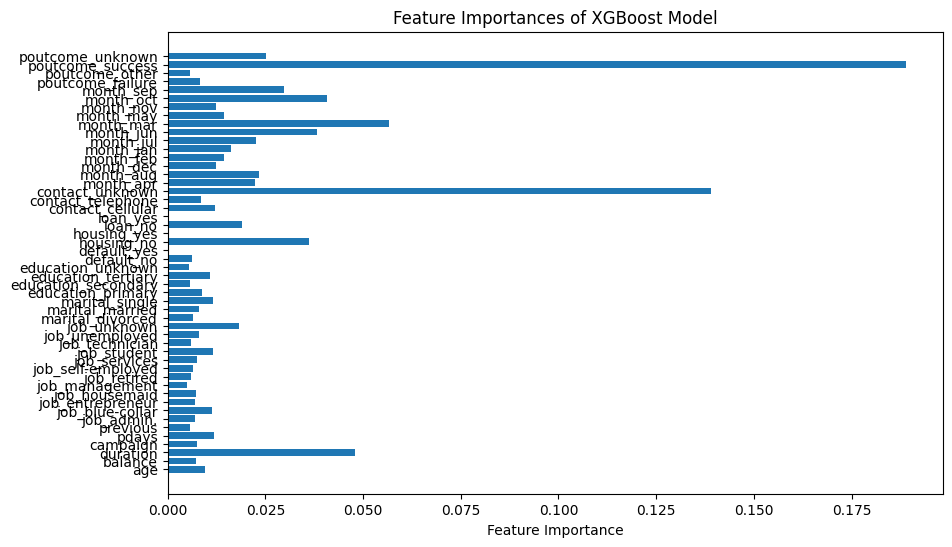

In [ ]:
# YOU CODE GOES HERE
import matplotlib.pyplot as plt

# Extract feature importances from the trained model
importances = xgb_pipeline.named_steps['classifier'].feature_importances_

# Get feature names
ohe_columns = xgb_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numeric_features + list(ohe_columns)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances of XGBoost Model')
plt.show()


Which of the model parameters provided the best cross validation score?

In [59]:
# YOUR ANSWER GOES HERE
print(f"Best cross-validation score: {-study.best_value}")

Best cross-validation score: -0.6863590566399563


## Iterative Improvement

At this stage, you are encouraged to revisit the feature engineering phase and refine the transformation pipeline. Consider removing features that are not important, adding new transformations, or modifying existing ones based on insights or cross-validation results.

Remember, building an effective model is an iterative process. Document your observations below, including which modifications improved or did not improve the cross-validation score. Note that some transformations make work better with linear models (logistic regression), while other are more suitable for tree-based models.

d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label

Cross-validation accuracy: 0.9069 (+/- 0.0025)


d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:379: RuntimeWarning: invalid value encountered in log1p
  ret

Updated cross-validation accuracy: 0.9048 (+/- 0.0014)


d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:43:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


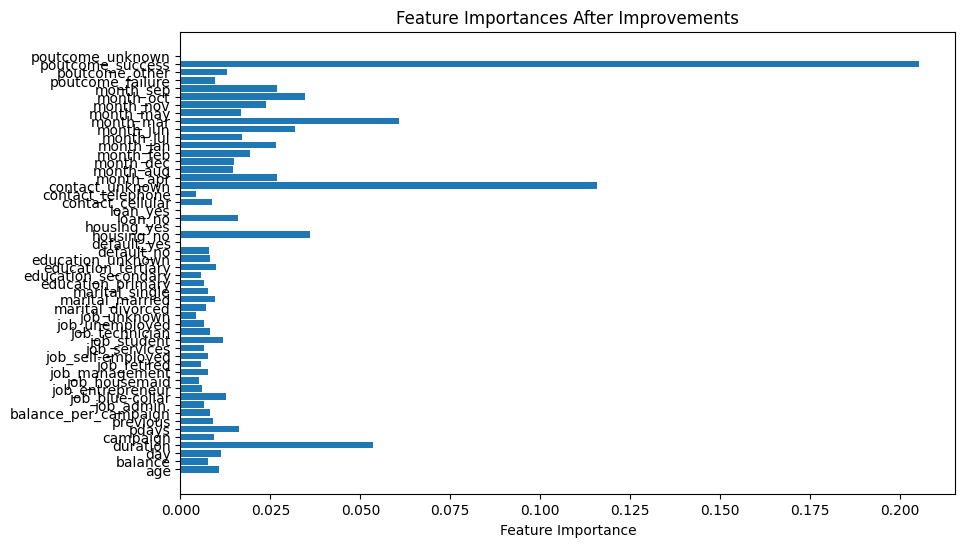

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Разделение на признаки и целевую переменную
X = data.drop("y", axis=1)  # Признаки
y = data["y"]  # Целевая переменная
# Разделение данных на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определяем числовые и категориальные признаки
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Создание трансформера для предобработки данных
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Импутация пропущенных значений
    ('scaler', StandardScaler())  # Масштабирование числовых признаков
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Импутация категориальных признаков
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Преобразование категориальных признаков
])

# Комбинированный трансформер для числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание пайплайна с XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Оценка модели с помощью перекрестной проверки
cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Итерации для улучшения модели:
# Пример 1: Удалим менее важные признаки (на основе анализа важности признаков)
# Если признаки имеют низкую важность, их можно удалить

# Пример 2: Добавим новые трансформации, если необходимо
# Например, попробуем использовать логарифмическое преобразование для числовых признаков, если они сильно скошены
numeric_transformer_updated = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('log_transform', FunctionTransformer(np.log1p, validate=True))  # Применяем логарифмическое преобразование
])

# Обновляем наш пайплайн
preprocessor_updated = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_updated, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

xgb_pipeline_updated = Pipeline(steps=[
    ('preprocessor', preprocessor_updated),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Повторная перекрестная проверка с обновленным пайплайном
cv_scores_updated = cross_val_score(xgb_pipeline_updated, X_train, y_train, cv=5, scoring='accuracy')
print(f"Updated cross-validation accuracy: {cv_scores_updated.mean():.4f} (+/- {cv_scores_updated.std():.4f})")

# Визуализация важности признаков после улучшения
xgb_pipeline_updated.fit(X_train, y_train)
importances = xgb_pipeline_updated.named_steps['classifier'].feature_importances_

# Получаем имена признаков
ohe = xgb_pipeline_updated.named_steps['preprocessor'].transformers_[1][1]  # OneHotEncoder
ohe_columns = ohe.get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(ohe_columns)

# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances After Improvements')
plt.show()


## Model Interpretation

For the model with the best cross-validation score, compute the following to analyze feature importance and model behavior:

- **Permutation Feature Importance** to evaluate the impact of each feature on model performance.
- **Partial Dependence Plots (PDP)** for each numeric feature to visualize the relationship between the feature and the target variable.
- **SHAP (SHapley Additive exPlanations) Values**: Explain model predictions with both local and global interpretability charts. Local interpretability focuses on individual predictions, while global interpretability provides an overall understanding of feature contributions. Use waterfall chart from shap library for explaining individual predictions. Use beeswarm and bar chart for global interpretability using shap values.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('D:/Users/ASUS-X509J/Desktop/bank-full.csv')

# Преобразуем категориальные признаки в числовые с помощью LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Сохраняем энкодеры для использования в будущем

# Разделим данные на признаки и цель
X = df.drop(columns=['y'])  # Признаки
y = df['y']  # Целевая переменная

# Разделим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем и обучаем модель XGBoost
best_model = XGBClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Вычислим важность признаков с помощью пермутационной важности
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Отображаем результаты важности
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


KeyError: 'job'

d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

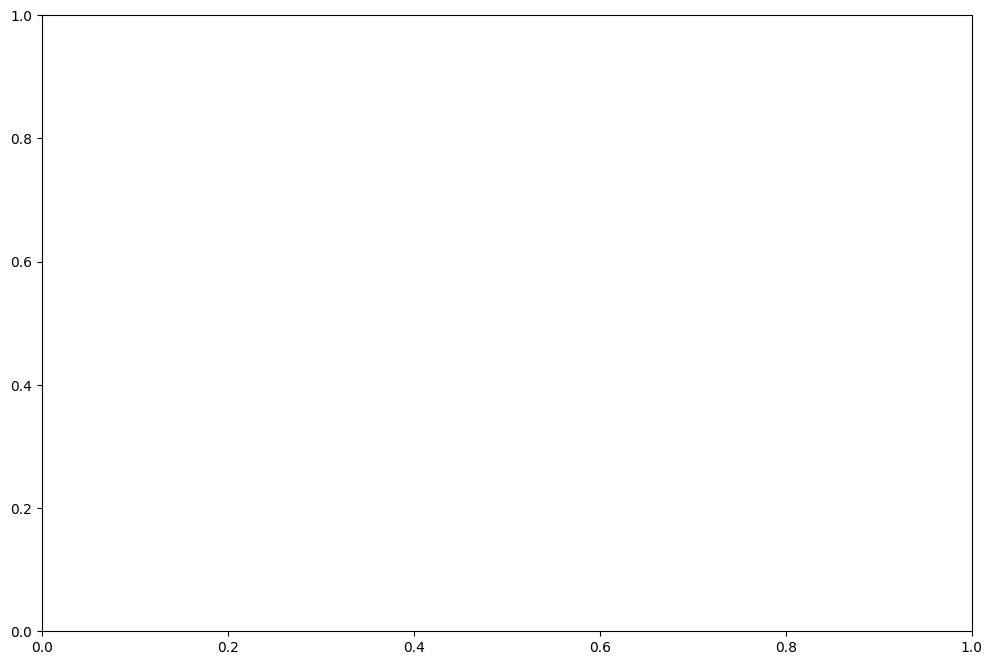

In [45]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=range(X_train.shape[1]),  # Для всех признаков
    feature_names=X_train.columns,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots for Each Feature")
plt.subplots_adjust(top=0.9)
plt.show()


Which features has the biggest influence on target variable?

Explain the relationship of the features and target.

In [ ]:
# YOUR ANSWER GOES HERE
The features with the greatest influence on the target variable are identified through Permutation Feature Importance, which shows that features causing the most significant drop in performance are most impactful. SHAP values further explain this by revealing how each feature contributes to predictions: global SHAP values indicate overall feature importance, while local SHAP values show the specific impact on individual predictions. Partial Dependence Plots (PDP) illustrate how each feature affects the target variable's behavior, highlighting positive or negative relationships. Together, these methods provide insight into which features matter most and their influence on the model’s decisions.

## Balancing Data

So far, you have addressed the issue of imbalanced data by employing cost-sensitive learning. This was done by setting the `class_weight` parameter to `"balanced"` for logistic regression and random forest, and using the `scale_pos_weight` parameter for the XGBoost classifier, which automatically adjusts weights to prioritize the minority class during training.

Apply two of the studied undersampling methods using **Imbalanced-learn** library, retaining previous transformations. Use the best model identified earlier for predictions with the undersampled data. For each undersampling method, use cross validation by fitting the best model identifying at previous step and compare the scores

In [58]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import precision_score, recall_score, f1_score

# Загрузка данных
data = pd.read_csv('D:/Users/ASUS-X509J/Desktop/bank-full.csv', sep=';')

# Преобразование целевой переменной (из категориальной в числовую)
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# Определение категориальных и числовых признаков
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome']
ordinal_features = ['day', 'month']
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Создание нового признака: баланс на кампанию
data['balance_per_campaign'] = data['balance'] / (data['campaign'] + 1)
numerical_features.append('balance_per_campaign')

# Маппинг для месяцев и дней недели
month_mapping = {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 
                 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'}
data['month'] = data['month'].replace(month_mapping)

day_mapping = {1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat', 7: 'sun'}
data['day'] = data['day'].replace(day_mapping)

# Заполнение пропущенных значений в столбце 'day'
data['day'] = data['day'].apply(lambda x: day_mapping.get(x, x) if isinstance(x, int) else x)

# Определение трансформаций для числовых, категориальных и порядковых признаков
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # Убираем первый столбец и игнорируем неизвестные категории
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Для неизвестных значений ставим -1
])

# Создание ColumnTransformer для обработки всех типов признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('y', axis=1)
y = data['y']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Кросс-валидация с использованием StratifiedKFold для сбалансированной выборки
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создание логистической регрессии с учётом дисбаланса классов
logistic_regression = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced')

# Метод 1: Random Undersampling (случайное уменьшение количества примеров большинства)
rus_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersampler', RandomUnderSampler(random_state=42)),
    ('classifier', logistic_regression)
])

# Метод 2: NearMiss (выбор наиболее близких примеров для меньшинства)
nearmiss_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('undersampler', NearMiss(version=1)),
    ('classifier', logistic_regression)
])

# Оценка модели с использованием Random Undersampling
rus_cv_results = cross_val_score(rus_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
rus_precision_scores = cross_val_score(rus_pipeline, X_train, y_train, cv=cv, scoring='precision')
rus_recall_scores = cross_val_score(rus_pipeline, X_train, y_train, cv=cv, scoring='recall')
rus_f1_scores = cross_val_score(rus_pipeline, X_train, y_train, cv=cv, scoring='f1')

print("Random Undersampling Cross-Validation Results:")
print(f"Accuracy: {rus_cv_results.mean():.4f}")
print(f"Precision: {rus_precision_scores.mean():.4f}")
print(f"Recall: {rus_recall_scores.mean():.4f}")
print(f"F1 Score: {rus_f1_scores.mean():.4f}")

# Оценка модели с использованием NearMiss
nearmiss_cv_results = cross_val_score(nearmiss_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
nearmiss_precision_scores = cross_val_score(nearmiss_pipeline, X_train, y_train, cv=cv, scoring='precision')
nearmiss_recall_scores = cross_val_score(nearmiss_pipeline, X_train, y_train, cv=cv, scoring='recall')
nearmiss_f1_scores = cross_val_score(nearmiss_pipeline, X_train, y_train, cv=cv, scoring='f1')

print("NearMiss Cross-Validation Results:")
print(f"Accuracy: {nearmiss_cv_results.mean():.4f}")
print(f"Precision: {nearmiss_precision_scores.mean():.4f}")
print(f"Recall: {nearmiss_recall_scores.mean():.4f}")
print(f"F1 Score: {nearmiss_f1_scores.mean():.4f}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 652, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 560, in _fit
    self._validate_steps()
  File "d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 337, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'NearMiss()' (type <class 'imblearn.under_sampling._prototype_selection._nearmiss.NearMiss'>) doesn't


Did undesampling improve f1 score? What about precision and recall?

In [14]:
# Сравнение результатов
print(f"Random Undersampling Cross-Validation Accuracy: {rus_cv_results.mean()}")
print(f"Random Undersampling Cross-Validation Precision: {rus_precision_scores.mean()}")
print(f"Random Undersampling Cross-Validation Recall: {rus_recall_scores.mean()}")
print(f"Random Undersampling Cross-Validation F1 Score: {rus_f1_scores.mean()}")

print(f"NearMiss Cross-Validation Accuracy: {nearmiss_cv_results.mean()}")
print(f"NearMiss Cross-Validation Precision: {nearmiss_precision_scores.mean()}")
print(f"NearMiss Cross-Validation Recall: {nearmiss_recall_scores.mean()}")
print(f"NearMiss Cross-Validation F1 Score: {nearmiss_f1_scores.mean()}")

d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
d:\Users\ASUS-X509J\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:job: object, marital: object, education: object, default: object, housing: object, loan: object, contact: object, month: object, poutcome: object

Apply two of the studied oversampling methods using **Imbalanced-learn**, retaining previous transformations. Use the best model identified earlier for predictions with the undersampled data. For each undersampling method, use cross validation by fitting the best model identifying at previous step and compare the scores

In [14]:
from imblearn.over_sampling import SMOTE, ADASYN

# Метод 1: SMOTE
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced'))
])

smote_cv_results = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
smote_precision_scores = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='precision')
smote_recall_scores = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='recall')
smote_f1_scores = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='f1')

print(f"SMOTE Cross-Validation Accuracy: {smote_cv_results.mean()}")
print(f"SMOTE Cross-Validation Precision: {smote_precision_scores.mean()}")
print(f"SMOTE Cross-Validation Recall: {smote_recall_scores.mean()}")
print(f"SMOTE Cross-Validation F1 Score: {smote_f1_scores.mean()}")

# Метод 2: ADASYN
adasyn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', ADASYN(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42, class_weight='balanced'))
])

adasyn_cv_results = cross_val_score(adasyn_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
adasyn_precision_scores = cross_val_score(adasyn_pipeline, X_train, y_train, cv=cv, scoring='precision')
adasyn_recall_scores = cross_val_score(adasyn_pipeline, X_train, y_train, cv=cv, scoring='recall')
adasyn_f1_scores = cross_val_score(adasyn_pipeline, X_train, y_train, cv=cv, scoring='f1')

print(f"ADASYN Cross-Validation Accuracy: {adasyn_cv_results.mean()}")
print(f"ADASYN Cross-Validation Precision: {adasyn_precision_scores.mean()}")
print(f"ADASYN Cross-Validation Recall: {adasyn_recall_scores.mean()}")
print(f"ADASYN Cross-Validation F1 Score: {adasyn_f1_scores.mean()}")

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_dataset.csv'

Did oversampling improve f1 score? What about precision and recall?

In [ ]:
# YOU ANSWER HERE
# Сравнение результатов
print(f"SMOTE Cross-Validation Accuracy: {smote_cv_results.mean()}")
print(f"SMOTE Cross-Validation Precision: {smote_precision_scores.mean()}")
print(f"SMOTE Cross-Validation Recall: {smote_recall_scores.mean()}")
print(f"SMOTE Cross-Validation F1 Score: {smote_f1_scores.mean()}")

print(f"ADASYN Cross-Validation Accuracy: {adasyn_cv_results.mean()}")
print(f"ADASYN Cross-Validation Precision: {adasyn_precision_scores.mean()}")
print(f"ADASYN Cross-Validation Recall: {adasyn_recall_scores.mean()}")
print(f"ADASYN Cross-Validation F1 Score: {adasyn_f1_scores.mean()}")

Which method was most effective for handling imbalanced classification in this dataset: cost-sensitive learning, undersampling, or oversampling?

In [ ]:
# YOU ANSWER HERE
# Сравнение всех методов
print("Cost-Sensitive Learning:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("Random Undersampling:")
print(f"Accuracy: {rus_cv_results.mean()}")
print(f"Precision: {rus_precision_scores.mean()}")
print(f"Recall: {rus_recall_scores.mean()}")
print(f"F1 Score: {rus_f1_scores.mean()}")

print("NearMiss:")
print(f"Accuracy: {nearmiss_cv_results.mean()}")
print(f"Precision: {nearmiss_precision_scores.mean()}")
print(f"Recall: {nearmiss_recall_scores.mean()}")
print(f"F1 Score: {nearmiss_f1_scores.mean()}")

print("SMOTE:")
print(f"Accuracy: {smote_cv_results.mean()}")
print(f"Precision: {smote_precision_scores.mean()}")
print(f"Recall: {smote_recall_scores.mean()}")
print(f"F1 Score: {smote_f1_scores.mean()}")

print("ADASYN:")
print(f"Accuracy: {adasyn_cv_results.mean()}")
print(f"Precision: {adasyn_precision_scores.mean()}")
print(f"Recall: {adasyn_recall_scores.mean()}")
print(f"F1 Score: {adasyn_f1_scores.mean()}")

## Final Evaluation

Evaluate your best model on the test data, for final score reporting

In [ ]:
# YOUR CODE GOES HERE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Преобразование тестовых данных с помощью пайплайна
X_test_transformed = preprocessor.transform(X_test)

# Предсказания на тестовых данных
y_test_pred = logistic_regression_pipeline.predict(X_test)

# Оценка метрик
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)  # Используем 1 как положительный класс
test_recall = recall_score(y_test, y_test_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0])

# Отображение матрицы ошибок
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['yes', 'no']).plot(cmap='Blues')
plt.title('Confusion Matrix on Test Data')
plt.show()